# Guillem Mirabent Rubinat - Final Project Data Visualization

In [57]:
library(caret)
# library(DMwR)
library(FNN)
library(foreign)
library(pracma)
library(pROC)
library(rminer)
library(stepPlr)
library(nnet)
library(ltm)
library(glmnet)
library(plyr)
library(kernlab)
library(ggplot2)
library(scales)
library(zoo)
library(lubridate)
library(chron)
library(stats)
library(shiny)
library(sp)
library(leaflet)
library(RColorBrewer)
library(dplyr)
# library(rgdal)
library(sf)
library(tidyr)
library(viridis)

In [58]:
setwd("/Users/guillemmirabentrubinat/Library/CloudStorage/OneDrive-Personal/BSE/Data Visualization/1a_FINAL_PROJ/Mirabent_Guillem_FINAL_PROJECT_DV")

In [59]:
ppdata = read.csv("csvs/pp_subset.csv", header = FALSE)

In [60]:
head(ppdata)

V1                                     V2     V3               V4       V5 V6
1 {5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A}  42000 1995-12-21 00:00 NE4 9DN  S  N 
2 {75050A84-BC0E-9A88-E053-6B04A8C02390} 321500 2018-07-30 00:00 MK19 7AE S  N 
3 {C0D9D876-2189-4D36-BA20-29B424C415E2} 144000 2005-03-22 00:00 DA17 5BW T  N 
4 {C8A3A575-D969-0425-E053-6C04A8C0947B} 900000 2021-06-29 00:00 E18 2DP  D  N 
5 {773C6432-06AE-4471-B7B1-993D9CE852E0} 390000 2003-05-09 00:00 E12 6PQ  T  N 
6 {79A74E21-8EC9-1289-E053-6B04A8C01627} 186000 2018-10-03 00:00 GL2 4UF  D  N 
  V7 V8   V9         V10               V11       V12                
1 F  8    Unnamed: 8 MATFEN PLACE      FENHAM    NEWCASTLE UPON TYNE
2 F  11              WOLVERTON ROAD    HAVERSHAM MILTON KEYNES      
3 F  9               KENTISH ROAD                BELVEDERE          
4 F  59              CHEYNE AVENUE               LONDON             
5 F  345A            HIGH STREET NORTH LONDON    LONDON             
6 F  148             COURTFIELD ROAD   QUEDGELEY GLOUCESTER         
  V13                   V14             V15 V16
1 NEWCASTLE UPON TYNE.1 TYNE AND WEAR   A   A.1
2 MILTON KEYNES         MILTON KEYNES   A   A  
3 BEXLEY                GREATER LONDON  A   A  
4 REDBRIDGE             GREATER LONDON  A   A  
5 NEWHAM                GREATER LONDON  A   A  
6 GLOUCESTER            GLOUCESTERSHIRE A   A

In [61]:
new_col_names = c(  "transaction_unique_identifier",
                    "price",
                    "date_of_transfer",
                    "postcode",
                    "property_type",
                    "old_new",
                    "duration",
                    "PAON",
                    "SAON",
                    "street",
                    "locality",
                    "town_city",
                    "district",
                    "county",
                    "PPD_category_type",
                    "record_status"
                )

colnames(ppdata) = new_col_names

head(ppdata)

transaction_unique_identifier          price  date_of_transfer postcode
1 {5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A}  42000 1995-12-21 00:00 NE4 9DN 
2 {75050A84-BC0E-9A88-E053-6B04A8C02390} 321500 2018-07-30 00:00 MK19 7AE
3 {C0D9D876-2189-4D36-BA20-29B424C415E2} 144000 2005-03-22 00:00 DA17 5BW
4 {C8A3A575-D969-0425-E053-6C04A8C0947B} 900000 2021-06-29 00:00 E18 2DP 
5 {773C6432-06AE-4471-B7B1-993D9CE852E0} 390000 2003-05-09 00:00 E12 6PQ 
6 {79A74E21-8EC9-1289-E053-6B04A8C01627} 186000 2018-10-03 00:00 GL2 4UF 
  property_type old_new duration PAON SAON       street            locality 
1 S             N       F        8    Unnamed: 8 MATFEN PLACE      FENHAM   
2 S             N       F        11              WOLVERTON ROAD    HAVERSHAM
3 T             N       F        9               KENTISH ROAD               
4 D             N       F        59              CHEYNE AVENUE              
5 T             N       F        345A            HIGH STREET NORTH LONDON   
6 D             N       F        148             COURTFIELD ROAD   QUEDGELEY
  town_city           district              county          PPD_category_type
1 NEWCASTLE UPON TYNE NEWCASTLE UPON TYNE.1 TYNE AND WEAR   A                
2 MILTON KEYNES       MILTON KEYNES         MILTON KEYNES   A                
3 BELVEDERE           BEXLEY                GREATER LONDON  A                
4 LONDON              REDBRIDGE             GREATER LONDON  A                
5 LONDON              NEWHAM                GREATER LONDON  A                
6 GLOUCESTER          GLOUCESTER            GLOUCESTERSHIRE A                
  record_status
1 A.1          
2 A            
3 A            
4 A            
5 A            
6 A

In [62]:
ppdata$price = as.numeric(ppdata$price)
head(ppdata)

transaction_unique_identifier          price  date_of_transfer postcode
1 {5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A}  42000 1995-12-21 00:00 NE4 9DN 
2 {75050A84-BC0E-9A88-E053-6B04A8C02390} 321500 2018-07-30 00:00 MK19 7AE
3 {C0D9D876-2189-4D36-BA20-29B424C415E2} 144000 2005-03-22 00:00 DA17 5BW
4 {C8A3A575-D969-0425-E053-6C04A8C0947B} 900000 2021-06-29 00:00 E18 2DP 
5 {773C6432-06AE-4471-B7B1-993D9CE852E0} 390000 2003-05-09 00:00 E12 6PQ 
6 {79A74E21-8EC9-1289-E053-6B04A8C01627} 186000 2018-10-03 00:00 GL2 4UF 
  property_type old_new duration PAON SAON       street            locality 
1 S             N       F        8    Unnamed: 8 MATFEN PLACE      FENHAM   
2 S             N       F        11              WOLVERTON ROAD    HAVERSHAM
3 T             N       F        9               KENTISH ROAD               
4 D             N       F        59              CHEYNE AVENUE              
5 T             N       F        345A            HIGH STREET NORTH LONDON   
6 D             N       F        148             COURTFIELD ROAD   QUEDGELEY
  town_city           district              county          PPD_category_type
1 NEWCASTLE UPON TYNE NEWCASTLE UPON TYNE.1 TYNE AND WEAR   A                
2 MILTON KEYNES       MILTON KEYNES         MILTON KEYNES   A                
3 BELVEDERE           BEXLEY                GREATER LONDON  A                
4 LONDON              REDBRIDGE             GREATER LONDON  A                
5 LONDON              NEWHAM                GREATER LONDON  A                
6 GLOUCESTER          GLOUCESTER            GLOUCESTERSHIRE A                
  record_status
1 A.1          
2 A            
3 A            
4 A            
5 A            
6 A

I'm going to also keep here a copy of the exact colors of the British flas so I can use them throughout the project.

#FFFFFF - White

#C8102E - Red

#012169 - Blue

In [63]:
white = "#FFFFFF"
red = "#C8102E"
blue = "#012169"

# TASK A:

### A1. For the 33 London boroughs create a box-plot (or several box-plots) that compares house prices between the boroughs. Can you think of a better way to compare borough house prices (please demonstrate)?

In [64]:
ppdata$year = year(ymd_hm(ppdata$date_of_transfer))

In [65]:
head(ppdata)

transaction_unique_identifier          price  date_of_transfer postcode
1 {5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A}  42000 1995-12-21 00:00 NE4 9DN 
2 {75050A84-BC0E-9A88-E053-6B04A8C02390} 321500 2018-07-30 00:00 MK19 7AE
3 {C0D9D876-2189-4D36-BA20-29B424C415E2} 144000 2005-03-22 00:00 DA17 5BW
4 {C8A3A575-D969-0425-E053-6C04A8C0947B} 900000 2021-06-29 00:00 E18 2DP 
5 {773C6432-06AE-4471-B7B1-993D9CE852E0} 390000 2003-05-09 00:00 E12 6PQ 
6 {79A74E21-8EC9-1289-E053-6B04A8C01627} 186000 2018-10-03 00:00 GL2 4UF 
  property_type old_new duration PAON SAON       street            locality 
1 S             N       F        8    Unnamed: 8 MATFEN PLACE      FENHAM   
2 S             N       F        11              WOLVERTON ROAD    HAVERSHAM
3 T             N       F        9               KENTISH ROAD               
4 D             N       F        59              CHEYNE AVENUE              
5 T             N       F        345A            HIGH STREET NORTH LONDON   
6 D             N       F        148             COURTFIELD ROAD   QUEDGELEY
  town_city           district              county          PPD_category_type
1 NEWCASTLE UPON TYNE NEWCASTLE UPON TYNE.1 TYNE AND WEAR   A                
2 MILTON KEYNES       MILTON KEYNES         MILTON KEYNES   A                
3 BELVEDERE           BEXLEY                GREATER LONDON  A                
4 LONDON              REDBRIDGE             GREATER LONDON  A                
5 LONDON              NEWHAM                GREATER LONDON  A                
6 GLOUCESTER          GLOUCESTER            GLOUCESTERSHIRE A                
  record_status year
1 A.1           1995
2 A             2018
3 A             2005
4 A             2021
5 A             2003
6 A             2018

In [66]:
calculate_missing_values = function(data) {
    missing_values = lapply(data, function(col) sum(is.na(col) | col == "", na.rm = TRUE))
    missing_values_count = unlist(missing_values)
    return(missing_values_count)
}

missing_values_per_column = calculate_missing_values(ppdata)

print(missing_values_per_column)

transaction_unique_identifier                         price 
                            0                             0 
             date_of_transfer                      postcode 
                            0                          9458 
                property_type                       old_new 
                            0                             0 
                     duration                          PAON 
                            0                           860 
                         SAON                        street 
                      5099994                         91516 
                     locality                     town_city 
                      2098121                             0 
                     district                        county 
                            0                             0 
            PPD_category_type                 record_status 
                            0                             0 
                        

In [67]:
ppdata = unique(ppdata)

In [68]:
london_sel = ppdata %>% 
    filter(county == "GREATER LONDON")

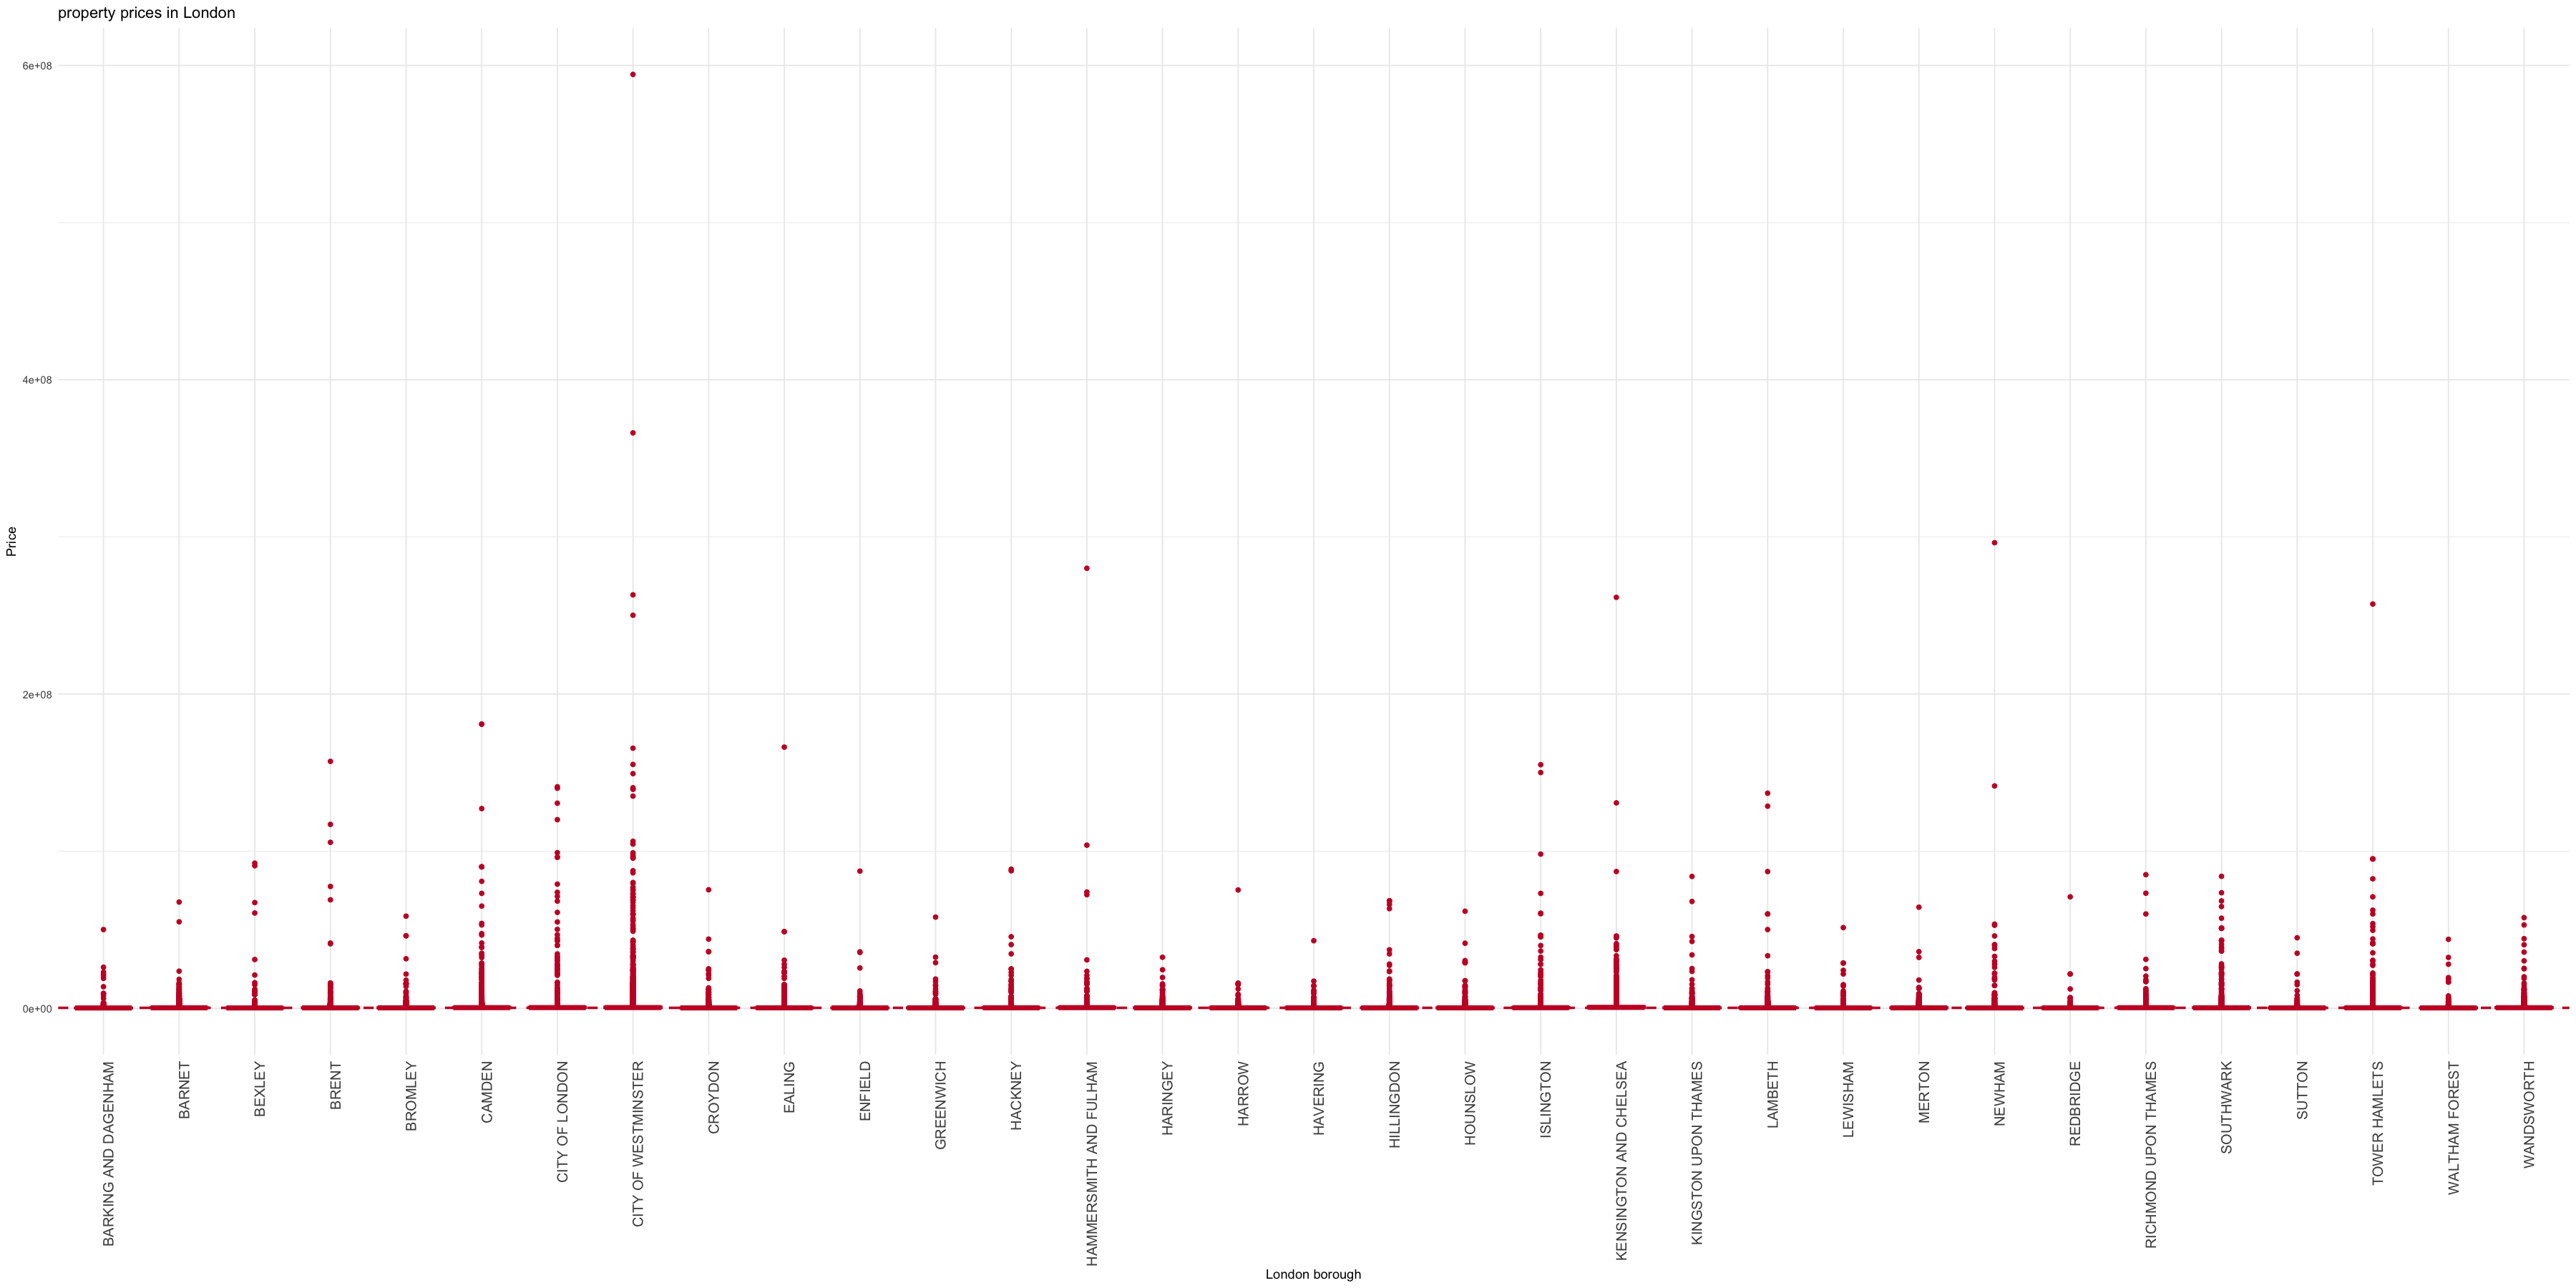

In [69]:
options(repr.plot.width = 30, repr.plot.height = 15)

london_boxplot = london_sel %>%
    group_by(district) %>%
    mutate(median_price = median(price)) %>%
    ungroup()

ggplot(london_boxplot, aes(x = district, y = price)) +
    geom_boxplot(fill = blue, color = red, size = 1) +
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        legend.position = "none") +
    labs(title = "property prices in London",
        x = "London borough",
        y = "Price") +
    geom_hline(yintercept = median(london_boxplot$price), linetype = "dashed", color = red, size = 1)

Having done this first plot, I realize that it would be much clearer if prices were presented in logarithmic scale instead so I'll change that below.

In [70]:
ggplot(london_boxplot, aes(x = district, y = log(price))) +
    geom_boxplot(fill = blue, color = red, size = 1) +
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        legend.position = "none") +
    labs(title = "property prices in London",
        x = "London borough",
        y = "Price") +
    geom_hline(yintercept = median(log(london_boxplot$price)), linetype = "dashed", color = red, size = 1)

But I still feel like plotting all of those boxplots is messy and doesn't easily show the differences between the boroughs. The median of each borough does look like a good way to compare them. A higher median means a generally more expensive borough so it would be really helpful to map the London boroughs with a color sclae that goes from the lowest median to the highest median. 

I found a map of London boroughs online from a UK governmental organization (https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london) and I will try to use it to map the boroughs with their median prices on a color scale (and also with nice labels with their median prices).

In [71]:
london_boroughs = st_read("London_Boroughs/London_Borough_Excluding_MHW.shp")
head(london_boroughs)

Reading layer `London_Borough_Excluding_MHW' from data source 
  `/Users/guillemmirabentrubinat/Library/CloudStorage/OneDrive-Personal/BSE/Data Visualization/1a_FINAL_PROJ/FINAL_PROJECT_DV/London_Boroughs/London_Borough_Excluding_MHW.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 33 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 503568.2 ymin: 155850.8 xmax: 561957.5 ymax: 200933.9
Projected CRS: OSGB36 / British National Grid


ERROR while rich displaying an object: Error in loadNamespace(x): non c'`e alcun pacchetto chiamato 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geoj

NAME                 GSS_CODE  HECTARES  NONLD_AREA ONS_INNER SUB_2009
1 Kingston upon Thames E09000021  3726.117   0.000    F         NA      
2 Croydon              E09000008  8649.441   0.000    F         NA      
3 Bromley              E09000006 15013.487   0.000    F         NA      
4 Hounslow             E09000018  5658.541  60.755    F         NA      
5 Ealing               E09000009  5554.428   0.000    F         NA      
6 Havering             E09000016 11445.735 210.763    F         NA      
  SUB_2006 geometry                      
1 NA       MULTIPOLYGON (((516401.6 16...
2 NA       MULTIPOLYGON (((535009.2 15...
3 NA       MULTIPOLYGON (((540373.6 15...
4 NA       MULTIPOLYGON (((521975.8 17...
5 NA       MULTIPOLYGON (((510253.5 18...
6 NA       MULTIPOLYGON (((549893.9 18...

This is how the map I got online looks like:

In [72]:
ggplot(data = london_boroughs) +
    geom_sf(fill = "lightblue", color = "white") +
    ggtitle("Map of the 33 London Boroughs") +
    theme_minimal() +
    theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), plot.title = element_text(hjust = 0.5))

In [74]:
postalcodes = st_read("postcodes.geojson")

Reading layer `postcodes' from data source 
  `/Users/guillemmirabentrubinat/Library/CloudStorage/OneDrive-Personal/BSE/Data Visualization/1a_FINAL_PROJ/FINAL_PROJECT_DV/postcodes.geojson' 
  using driver `GeoJSON'
Simple feature collection with 9850 features and 6 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -6.316403 ymin: 49.91486 xmax: 1.754602 ymax: 55.12934
Geodetic CRS:  WGS 84


In [75]:
# st_crs(postalcodes)
# st_crs(london_boroughs)

In [76]:
postalcodes2 = st_transform(postalcodes, st_crs(london_boroughs))

In [77]:
merged_london = st_join(london_boroughs, postalcodes2, join = st_intersects)
head(merged_london)

ERROR while rich displaying an object: Error in loadNamespace(x): non c'`e alcun pacchetto chiamato 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geoj

NAME                 GSS_CODE  HECTARES NONLD_AREA ONS_INNER SUB_2009
1   Kingston upon Thames E09000021 3726.117 0          F         NA      
1.1 Kingston upon Thames E09000021 3726.117 0          F         NA      
1.2 Kingston upon Thames E09000021 3726.117 0          F         NA      
1.3 Kingston upon Thames E09000021 3726.117 0          F         NA      
1.4 Kingston upon Thames E09000021 3726.117 0          F         NA      
1.5 Kingston upon Thames E09000021 3726.117 0          F         NA      
    SUB_2006 postcode min_price max_price mean_price median_price id    
1   NA       KT1 2DG  165000    165000    165000.0   165000       985748
1.1 NA       KT1 2LL  295000    295000    295000.0   295000       985817
1.2 NA       KT1 2QN  100000    100000    100000.0   100000       985923
1.3 NA       KT1 2SR  390000    390000    390000.0   390000       985462
1.4 NA       KT1 2TD   74000    425000    249500.0   249500       985471
1.5 NA       KT1 2TE   72000    242000    159666.7   165000       985472
    geometry                      
1   MULTIPOLYGON (((516401.6 16...
1.1 MULTIPOLYGON (((516401.6 16...
1.2 MULTIPOLYGON (((516401.6 16...
1.3 MULTIPOLYGON (((516401.6 16...
1.4 MULTIPOLYGON (((516401.6 16...
1.5 MULTIPOLYGON (((516401.6 16...

In [78]:
merged_london = merged_london %>%
    group_by(NAME) %>%
    summarize(means = mean(mean_price, na.rm = TRUE))

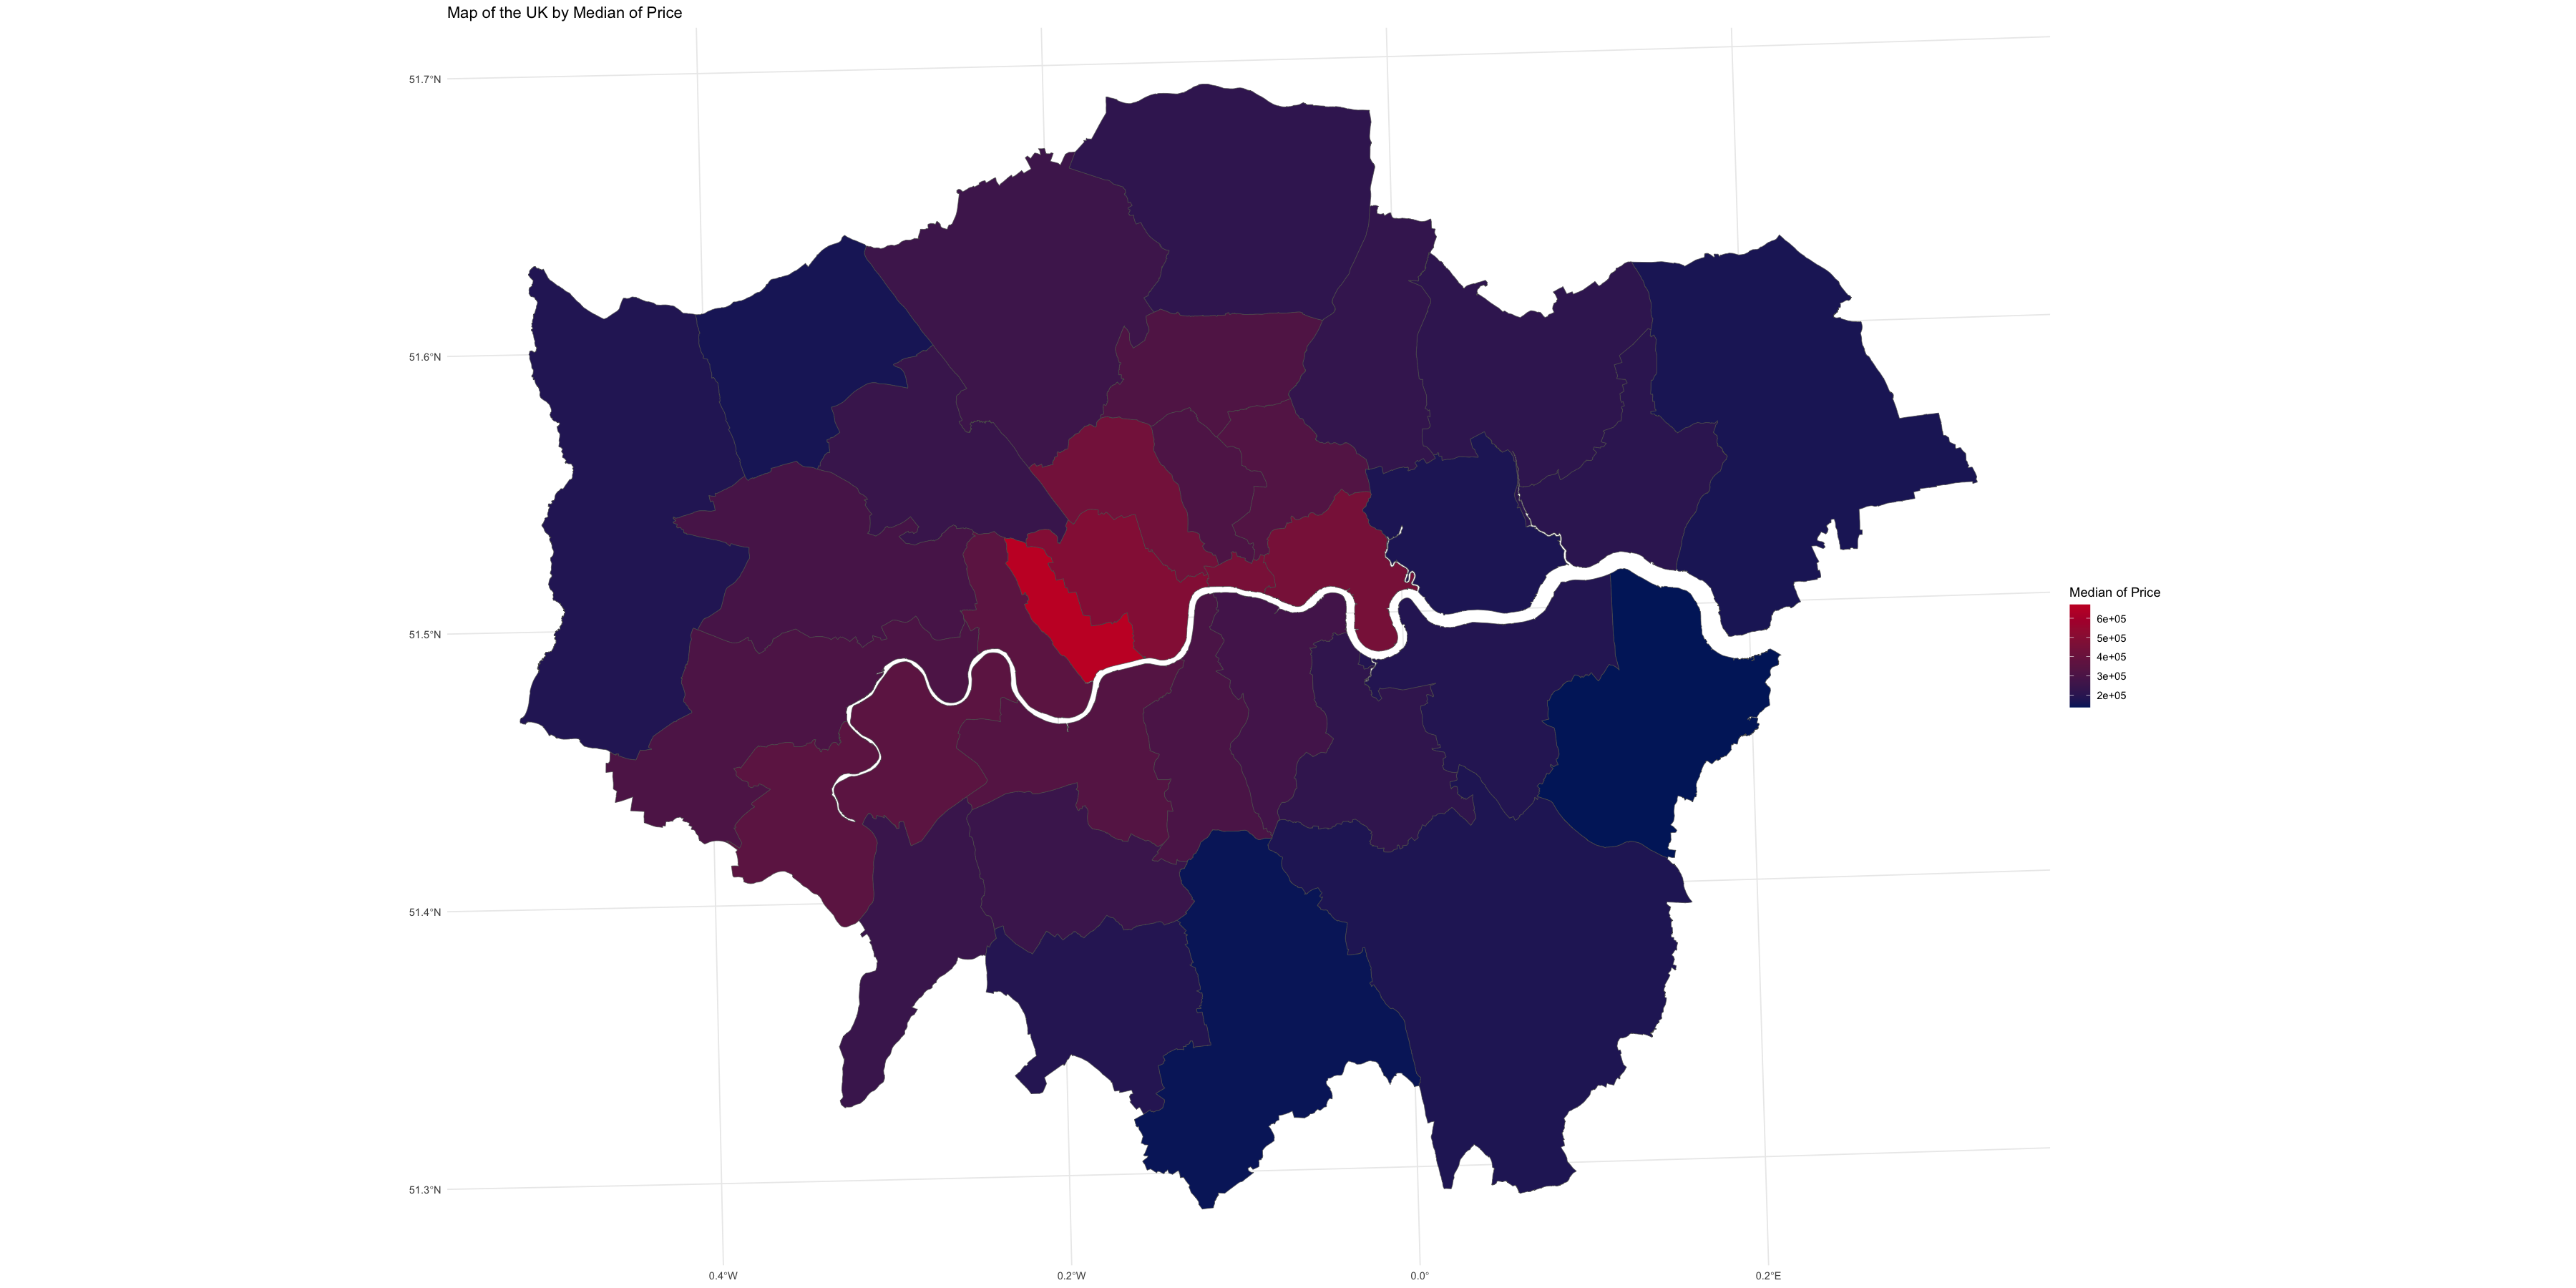

In [79]:
ggplot(data = merged_london) +
    geom_sf(aes(fill = means)) +
    scale_fill_gradient(low = blue, high = red,
                        name = "Median of Price",
                        na.value = "transparent") +
    labs(title = "Map of the UK by Median of Price") +
    theme_minimal()

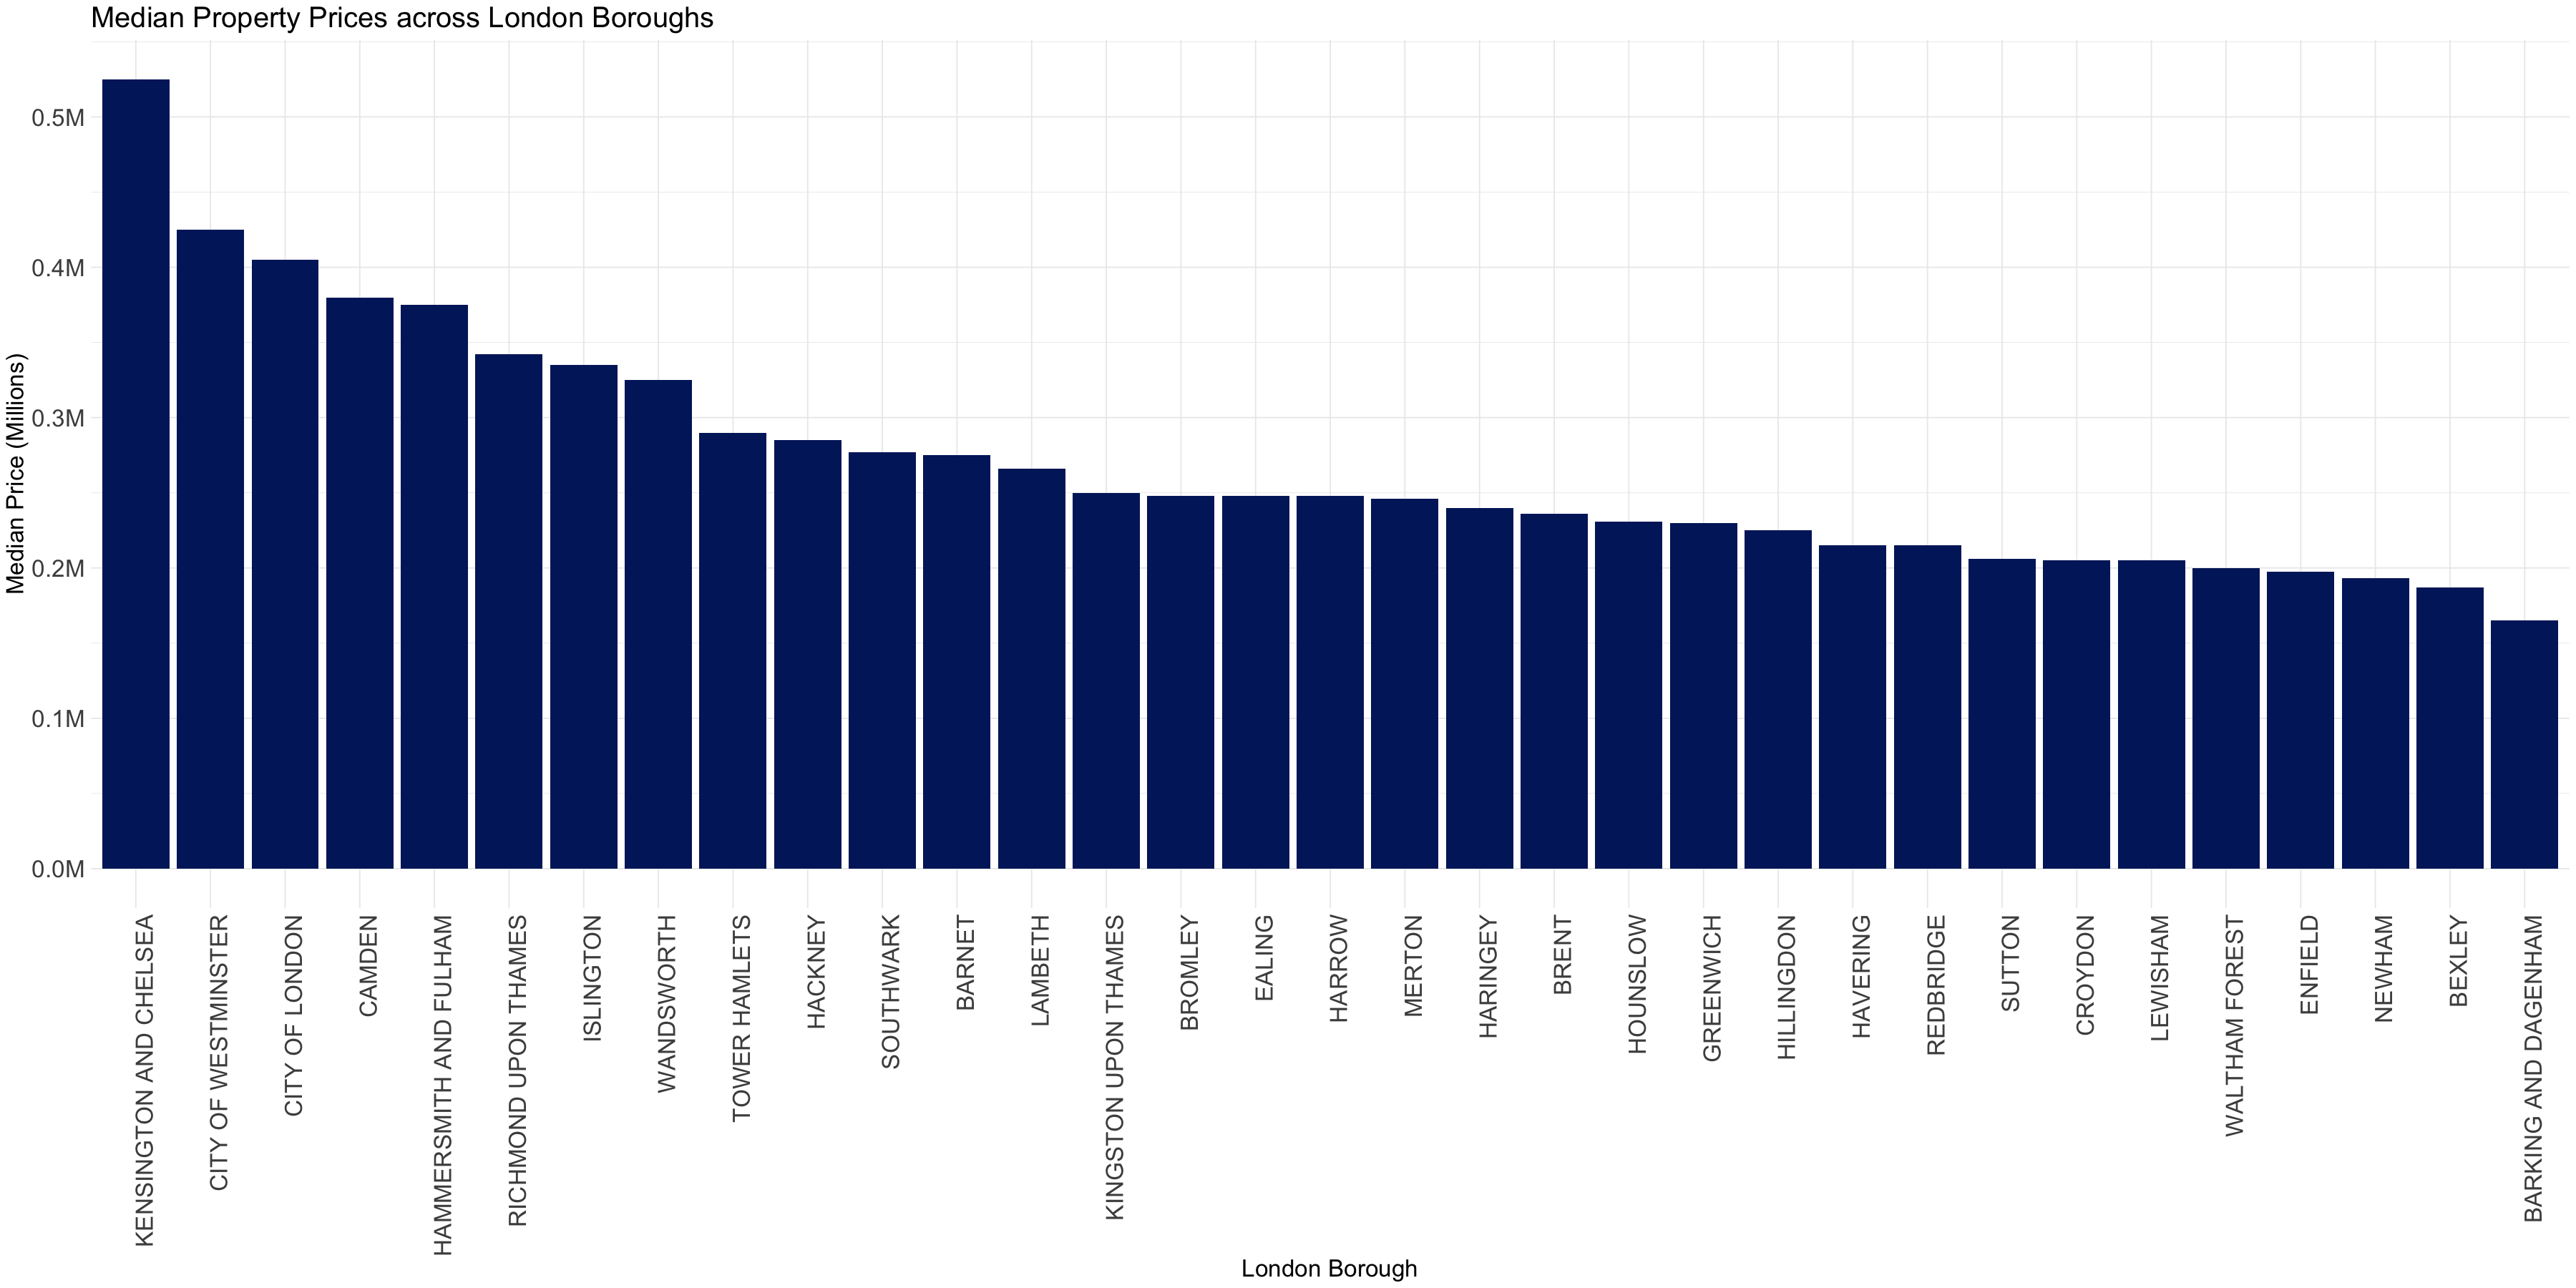

In [80]:
london_boroughs_median_prices = london_sel %>%
    group_by(district) %>%
    summarize(median_price = median(price)) %>%
    ungroup() %>%
    arrange(desc(median_price))

ggplot(london_boroughs_median_prices, aes(x = reorder(district, -median_price), y = median_price / 1e+06)) +
  geom_bar(stat = "identity", fill = blue) +
  theme_minimal() +
  labs(title = "Median Property Prices across London Boroughs",
       x = "London Borough",
       y = "Median Price (Millions)") +
  scale_y_continuous(labels = scales::label_number(suffix = "M")) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 20),
        axis.text.y = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        plot.title = element_text(size = 24))

That way the most important information here (which boroughs are the most expensive and which are the least expensive) is easily seen.

### A2. Could the entire dataset be used to estimate the relationship between price of flats and floor level? If yes, how would you show that relationship in a plot?

It does look like SAON is a column that could have information about flat number. As a result, being able to filter the data by property_type, setting it to "F" for Flat and then extracting information about floor level from SAON we could extract information about the relationship between price of flats and floor level.

I would show that relationship with a plot with points on the joints between the floor level and the price of the flat. There would also be an overlay with the linear regression between the two variables.

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `floor_number = extract_floor_number(SAON)`.
Caused by warning in `extract_floor_number()`:
! NA introdotti per coercizione"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 930608 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 930608 rows containing missing values or values outside the scale range
(`geom_point()`)."


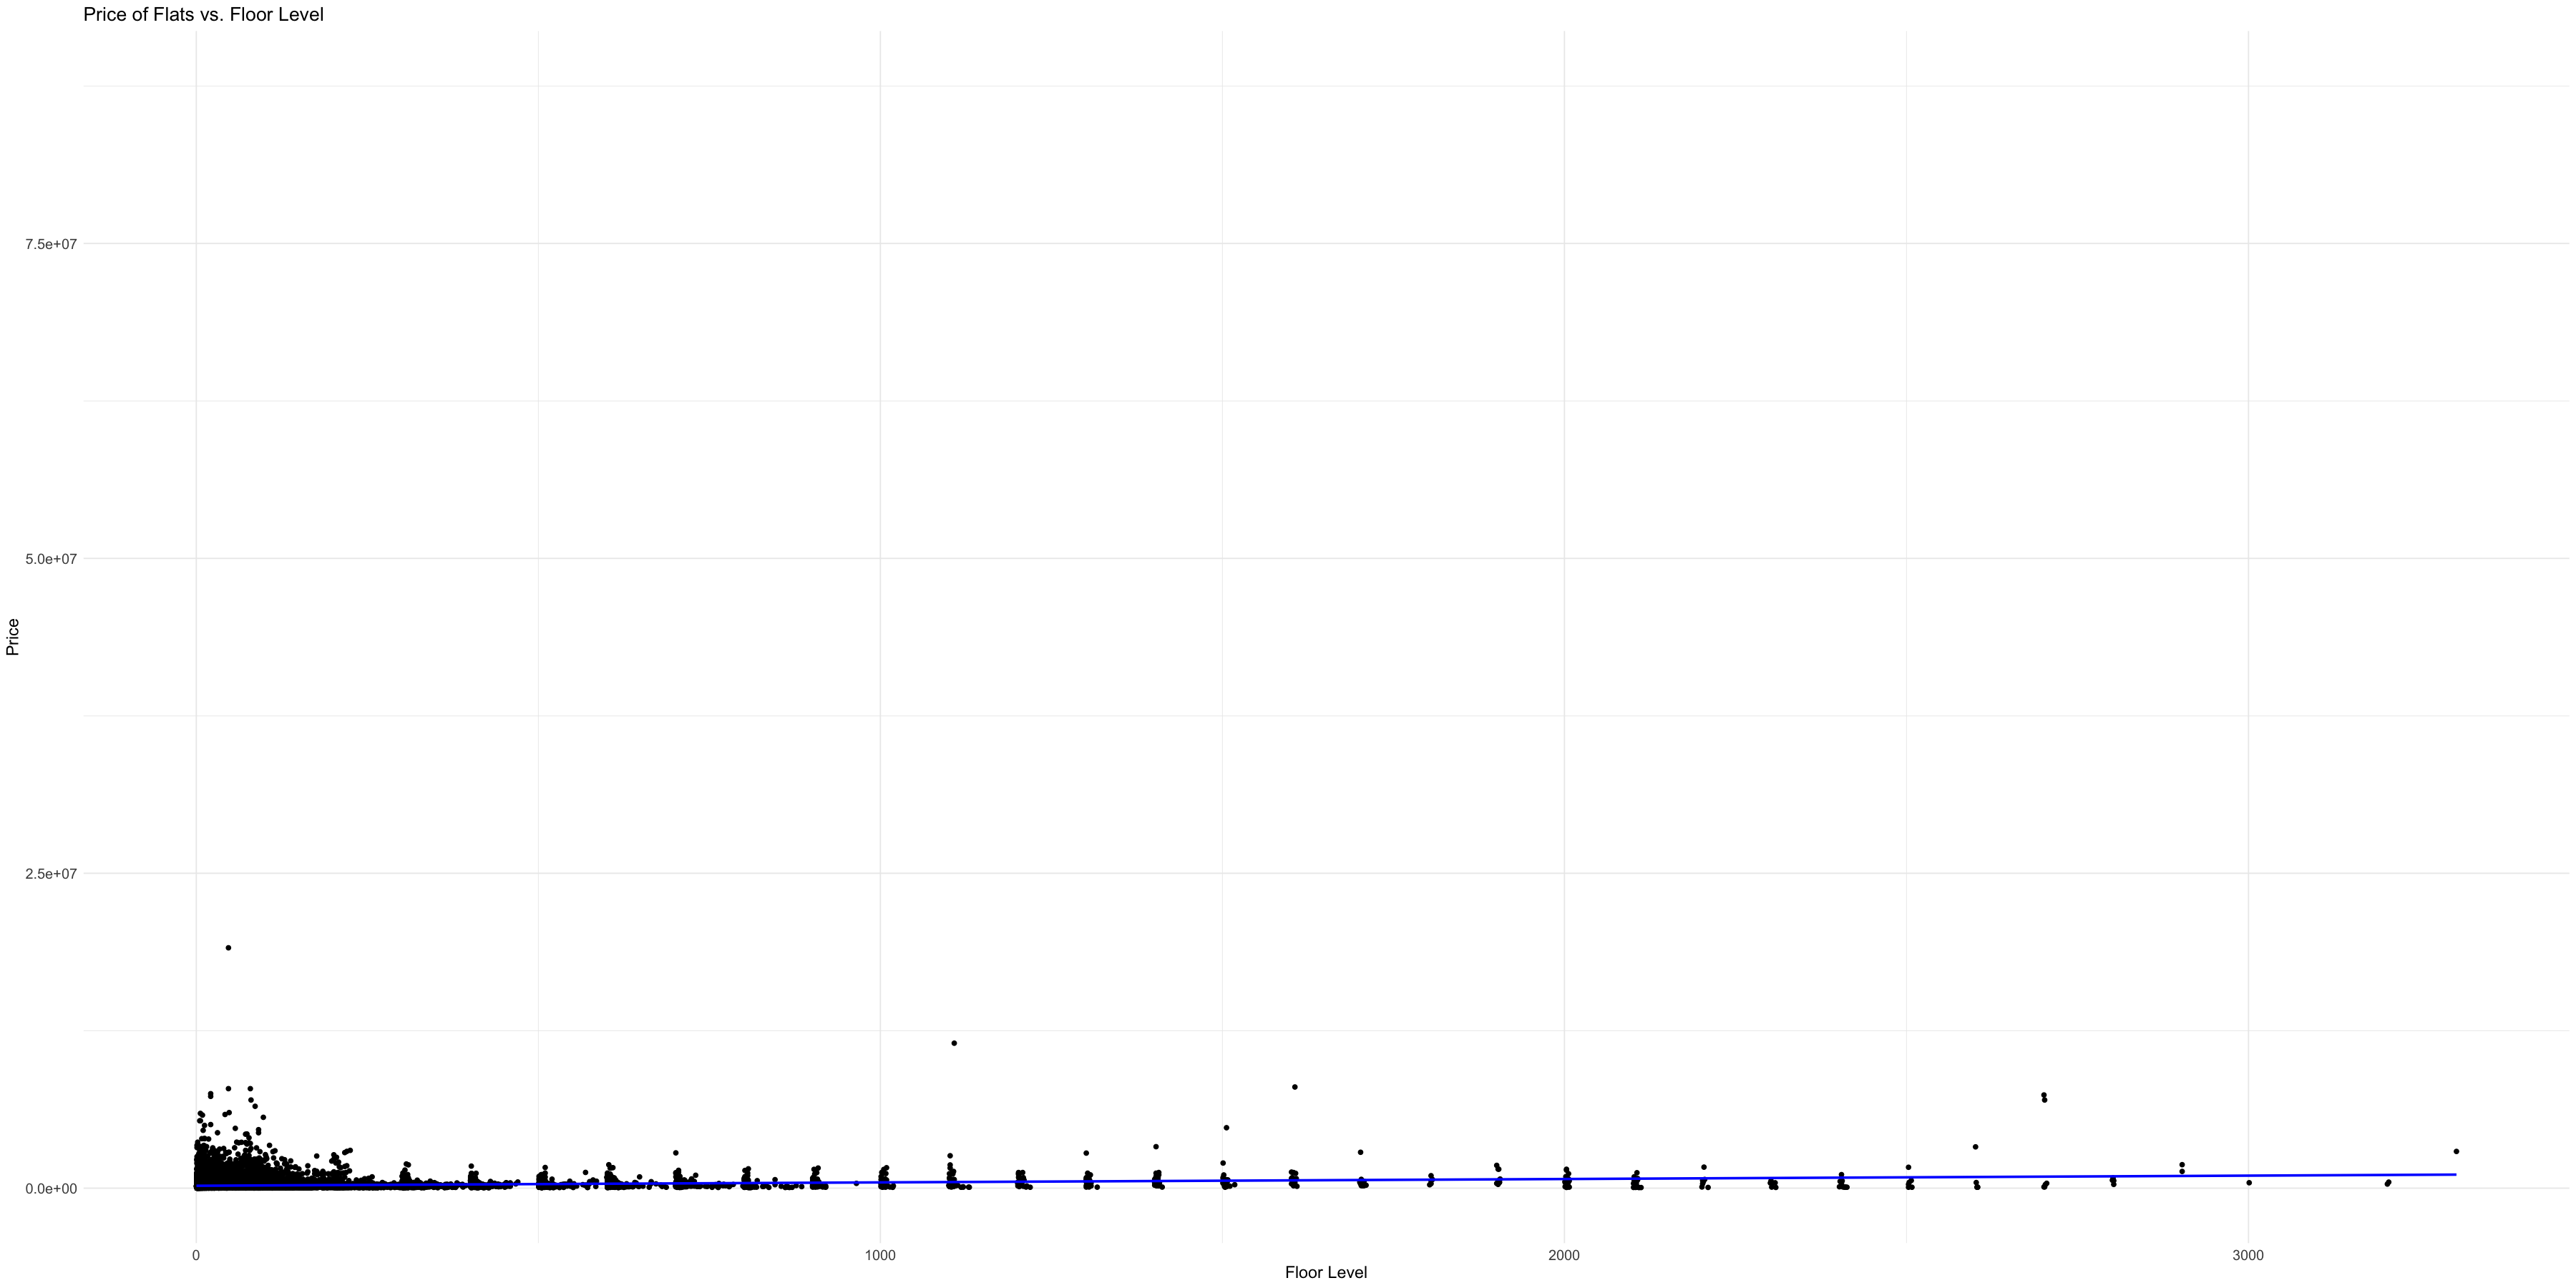

In [81]:
extract_floor_number = function(saon) {
    floor_number = as.numeric(gsub(".*Floor", "", saon))
    floor_number
}

ppdata = ppdata %>%
        filter(property_type == "F") %>%
    mutate(floor_number = extract_floor_number(SAON))

ggplot(ppdata, aes(x = floor_number, y = price)) +
    geom_point() +
    geom_smooth(method = "lm", color = "blue", se = FALSE) +
    theme_minimal() +
    labs(title = "Price of Flats vs. Floor Level",
        x = "Floor Level",
        y = "Price") +
    theme(axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 16))

At a first glance it does look like a more in deep reature extraction needs to be done. I will try to do that below.

In [82]:
print(unique(ppdata$SAON))

    [1] ""                                        
    [2] "FLAT 17"                                 
    [3] "FLAT 23"                                 
    [4] "FLAT 5"                                  
    [5] "FLAT 20"                                 
    [6] "APARTMENT 316"                           
    [7] "2"                                       
    [8] "FLAT 4"                                  
    [9] "FLAT 6"                                  
   [10] "FLAT 59"                                 
   [11] "FLAT 39"                                 
   [12] "33"                                      
   [13] "3"                                       
   [14] "FLAT 15"                                 
   [15] "FLAT 8"                                  
   [16] "APARTMENT 58"                            
   [17] "FLAT 2"                                  
   [18] "FLAT A 1-4"                              
   [19] "FLAT 136"                                
   [20] "FIRST FLOOR MAISONETTE

`geom_smooth()` using formula = 'y ~ x'


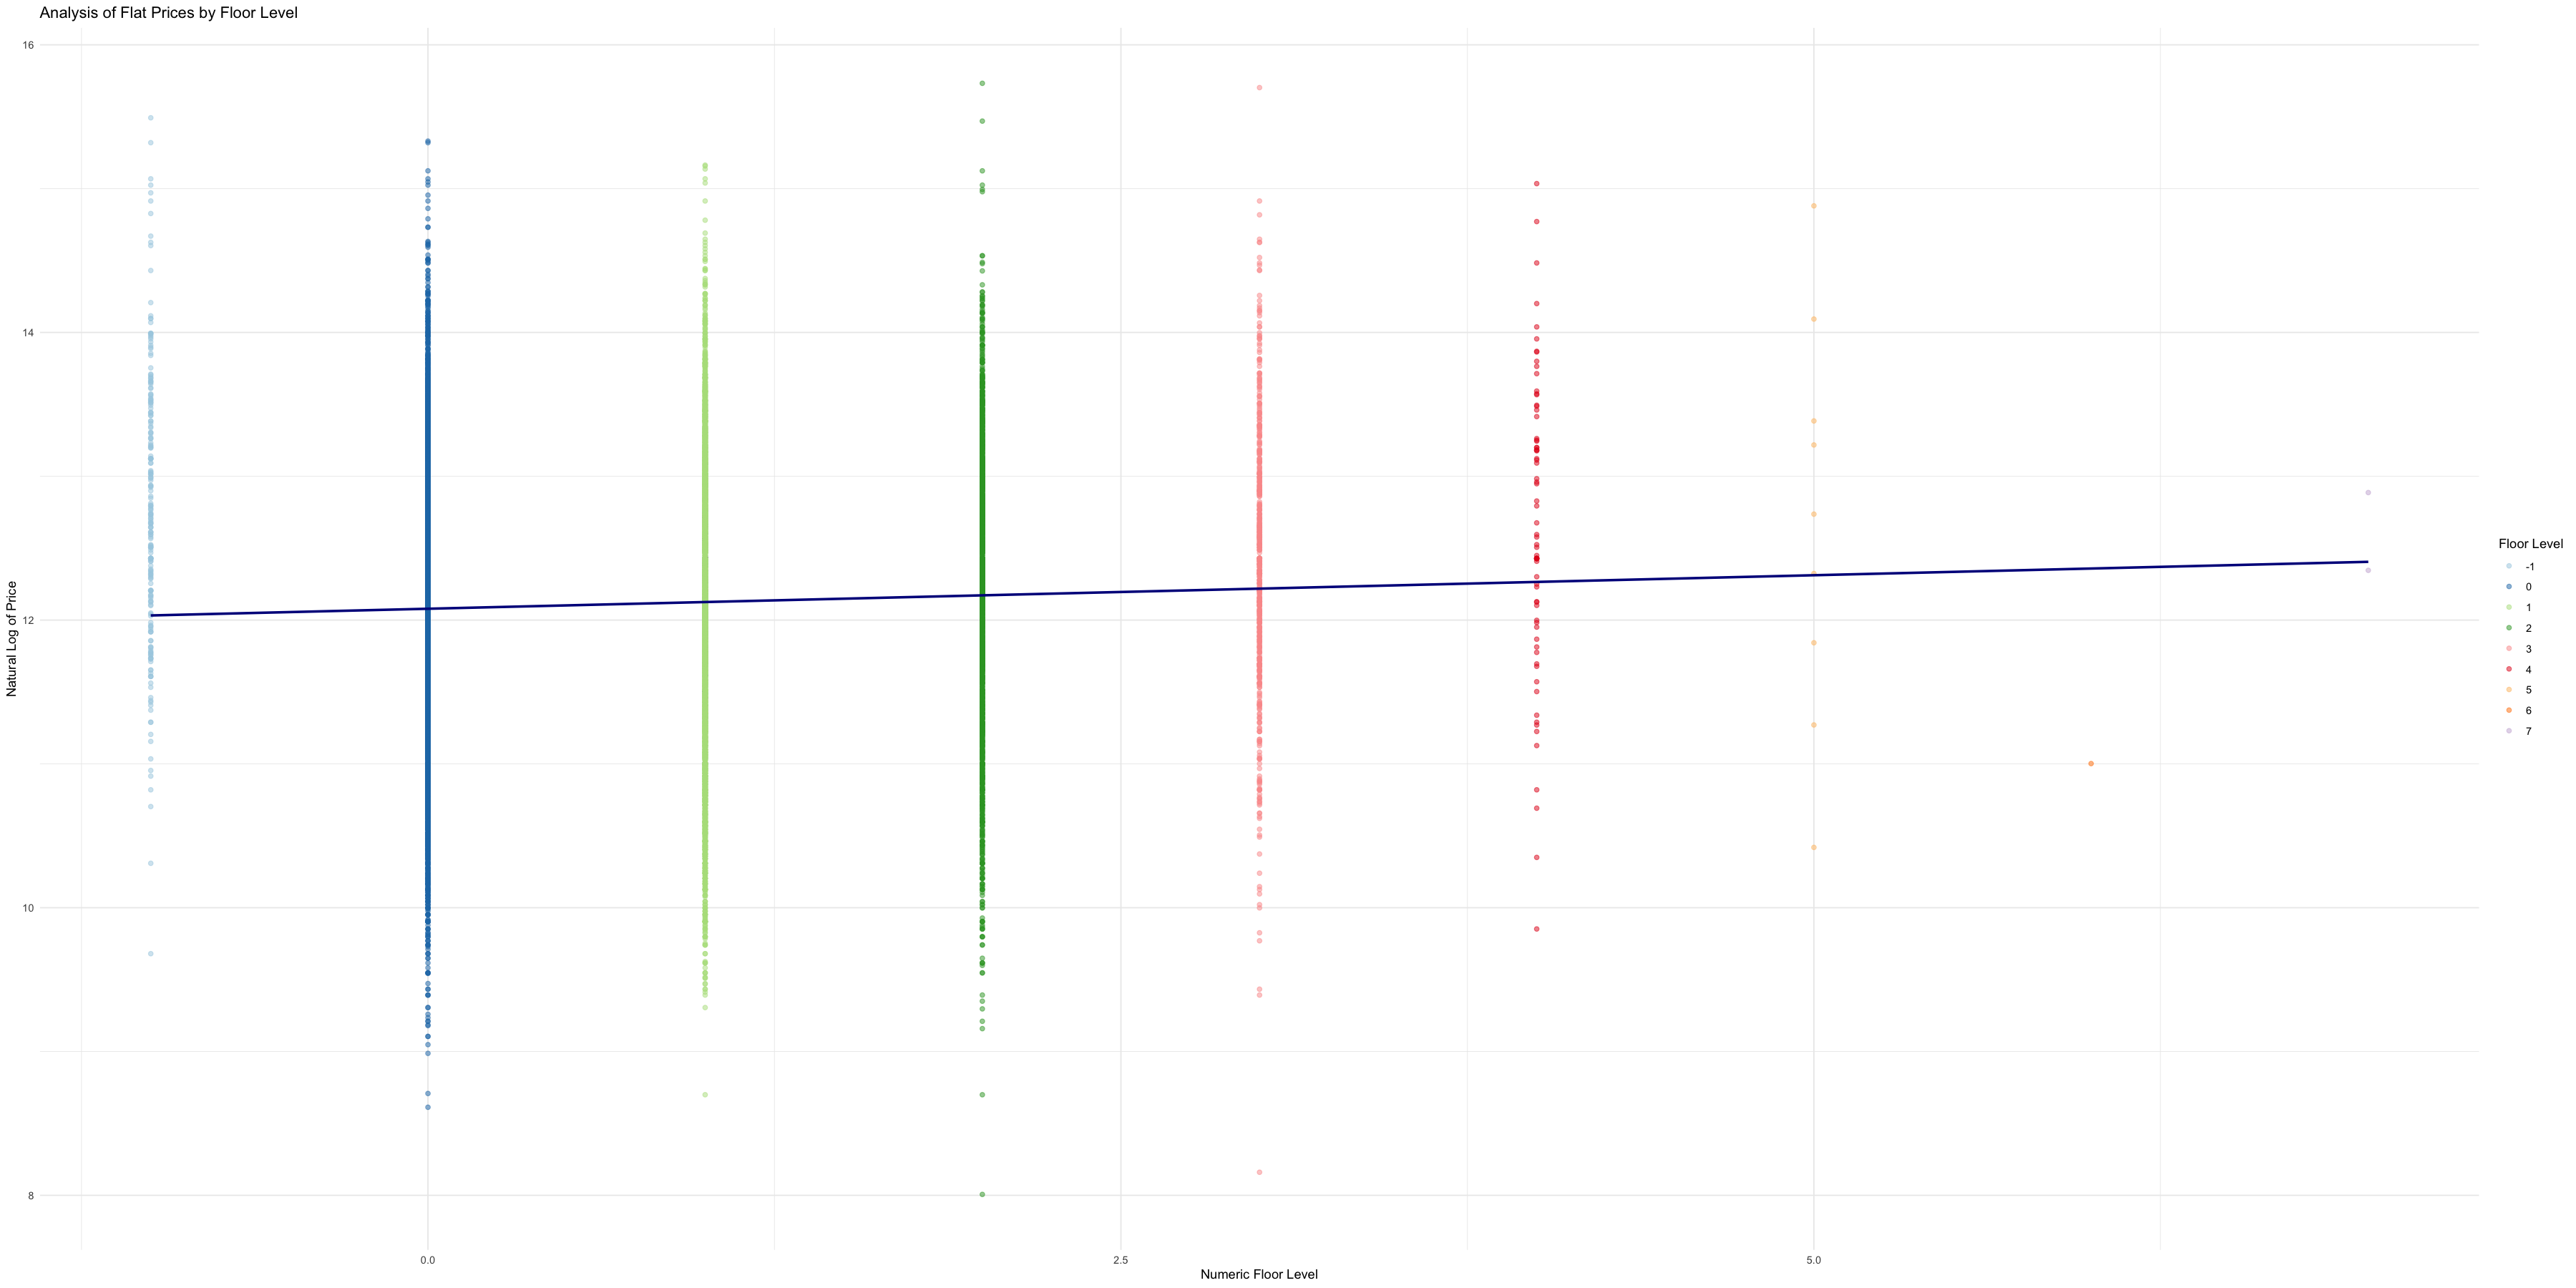

In [83]:
library(tidyverse)

preprocessed_floors = ppdata %>%
    mutate(
    extracted_floor = ifelse(
            str_detect(SAON, "FLOOR FLAT"), 
        str_extract(SAON, ".*?(?= FLOOR FLAT)"), 
        NA_character_
    )
    )

descriptive_floor_to_num = c(
    "GROUND" = 0, "FIRST" = 1, "SECOND" = 2, "THIRD" = 3, "FOURTH" = 4, "FIFTH" = 5,
    "SIXTH" = 6, "SEVENTH" = 7, "BASEMENT" = -1
)

translate_floor_descriptions = function(descriptive_text) {
    descriptive_terms = str_extract_all(descriptive_text, "[A-Z]+")[[1]]
    
    floor_levels = descriptive_floor_to_num[descriptive_terms]
    numeric_floor = na.omit(floor_levels)
    
    if (length(numeric_floor) > 0) {
        return(numeric_floor[1])
    } else {
        return(NA_real_)
    }
}

numeric_floor_levels = map_dbl(preprocessed_floors$extracted_floor, translate_floor_descriptions)

ppdata = ppdata %>%
    mutate(floor_level = numeric_floor_levels) %>%
    drop_na(floor_level) 

plot_data = ggplot(ppdata, aes(x = floor_level, y = log(price))) +
    geom_point(aes(color = as.factor(floor_level)), alpha = 0.5) +
    geom_smooth(method = "lm", se = FALSE, color = "darkblue") +
    scale_color_brewer(palette = "Paired", name = "Floor Level") +
    theme_minimal() +
    labs(
        title = "Analysis of Flat Prices by Floor Level",
        x = "Numeric Floor Level",
        y = "Natural Log of Price"
    )

model_results = lm(log(price) ~ floor_level, data = ppdata)
regression_coefficients = summary(model_results)$coefficients

plot_data

Looks a little bit better although at a first glance it doesn't look like if there's a relationship, that it is too strong. That being said, there's too much noise to draw any strong conclusions. I would say that probably the relationship would become clearer (or disappear) with much better data cleaning procedures but that's what I was able to get to.

# TASK B:

### B1. Create a GeoJSON file where each postcode is represented with a latitude, longitude value, together with minimum, maximum, mean and median house price.

In [84]:
postalcodes = read.csv("csvs/ukpostcodes.csv", header = TRUE)

In [85]:
statistics_postalcodes = ppdata %>%
    group_by(postcode) %>%
    summarise(min_price = min(price, na.rm = TRUE),
                max_price = max(price, na.rm = TRUE),
                mean_price = mean(price, na.rm = TRUE),
                median_price = median(price, na.rm = TRUE))


joint_pcs = merge(statistics_postalcodes, postalcodes, by = "postcode")
output_pc_file = st_as_sf(joint_pcs, coords = c("longitude", "latitude"))

# st_write(output_pc_file, "postcodes.geojson", driver = "GeoJSON")

### B2. Open the GeoJSON file in the GIS application of your choice and colour-code the data to give an overview of areas with high, medium and low median house price. Additionally, you can visualise this information as cloropleths or use shiny and add the information as markers on a map for a more interactive and impressive result.

In [86]:
postalcodes = st_read("postcodes.geojson")
head(postalcodes)

Reading layer `postcodes' from data source 
  `/Users/guillemmirabentrubinat/Library/CloudStorage/OneDrive-Personal/BSE/Data Visualization/1a_FINAL_PROJ/FINAL_PROJECT_DV/postcodes.geojson' 
  using driver `GeoJSON'
Simple feature collection with 9850 features and 6 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -6.316403 ymin: 49.91486 xmax: 1.754602 ymax: 55.12934
Geodetic CRS:  WGS 84


ERROR while rich displaying an object: Error in loadNamespace(x): non c'`e alcun pacchetto chiamato 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geoj

postcode min_price max_price mean_price median_price id     
1 AL1 4AG  155000    155000    155000.0   155000       1577639
2 AL1 5NF   60000    163500    107833.3   100000       1577182
3 AL2 1EN  185000    185000    185000.0   185000       1576265
4 AL5 5NG  175000    175000    175000.0   175000       1571859
5 AL9 7DY  122500    122500    122500.0   122500       1569670
6 B13 9AE   40000     44000     42000.0    42000       1567587
  geometry                   
1 POINT (-0.3276905 51.76243)
2 POINT (-0.3086757 51.74776)
3 POINT (-0.2999838 51.72616)
4 POINT (-0.3479512 51.81634)
5 POINT (-0.2185788 51.73466)
6 POINT (-1.881656 52.4497)

Source: https://www.diva-gis.org/gdata

In [87]:
map_uk = st_read("GB_map/GBR_adm2.shp")
head(map_uk)

Reading layer `GBR_adm2' from data source 
  `/Users/guillemmirabentrubinat/Library/CloudStorage/OneDrive-Personal/BSE/Data Visualization/1a_FINAL_PROJ/FINAL_PROJECT_DV/GB_map/GBR_adm2.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 192 features and 11 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -13.69139 ymin: 49.86542 xmax: 1.764168 ymax: 61.52708
Geodetic CRS:  WGS 84


ERROR while rich displaying an object: Error in loadNamespace(x): non c'`e alcun pacchetto chiamato 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geoj

ID_0 ISO NAME_0         ID_1 NAME_1  ID_2 NAME_2                      
1 242  GBR United Kingdom 1    England 1    Barking and Dagenham        
2 242  GBR United Kingdom 1    England 2    Bath and North East Somerset
3 242  GBR United Kingdom 1    England 3    Bedfordshire                
4 242  GBR United Kingdom 1    England 4    Berkshire                   
5 242  GBR United Kingdom 1    England 5    Bexley                      
6 242  GBR United Kingdom 1    England 6    Blackburn with Darwen       
  TYPE_2                ENGTYPE_2             NL_NAME_2
1 London Borough        London Borough        NA       
2 Unitary Authority     Unitary Authority     NA       
3 Administrative County Administrative County NA       
4 County                County                NA       
5 London Borough        London Borough        NA       
6 Unitary Authority     Unitary Authority     NA       
  VARNAME_2                       geometry                      
1 NA                              MULTIPOLYGON (((0.152422 51...
2 NA                              MULTIPOLYGON (((-2.71267 51...
3 NA                              MULTIPOLYGON (((-0.385149 5...
4 NA                              MULTIPOLYGON (((-1.486947 5...
5 NA                              MULTIPOLYGON (((0.080313 51...
6 Blackburn, Blackburn and Darwen MULTIPOLYGON (((-2.356571 5...

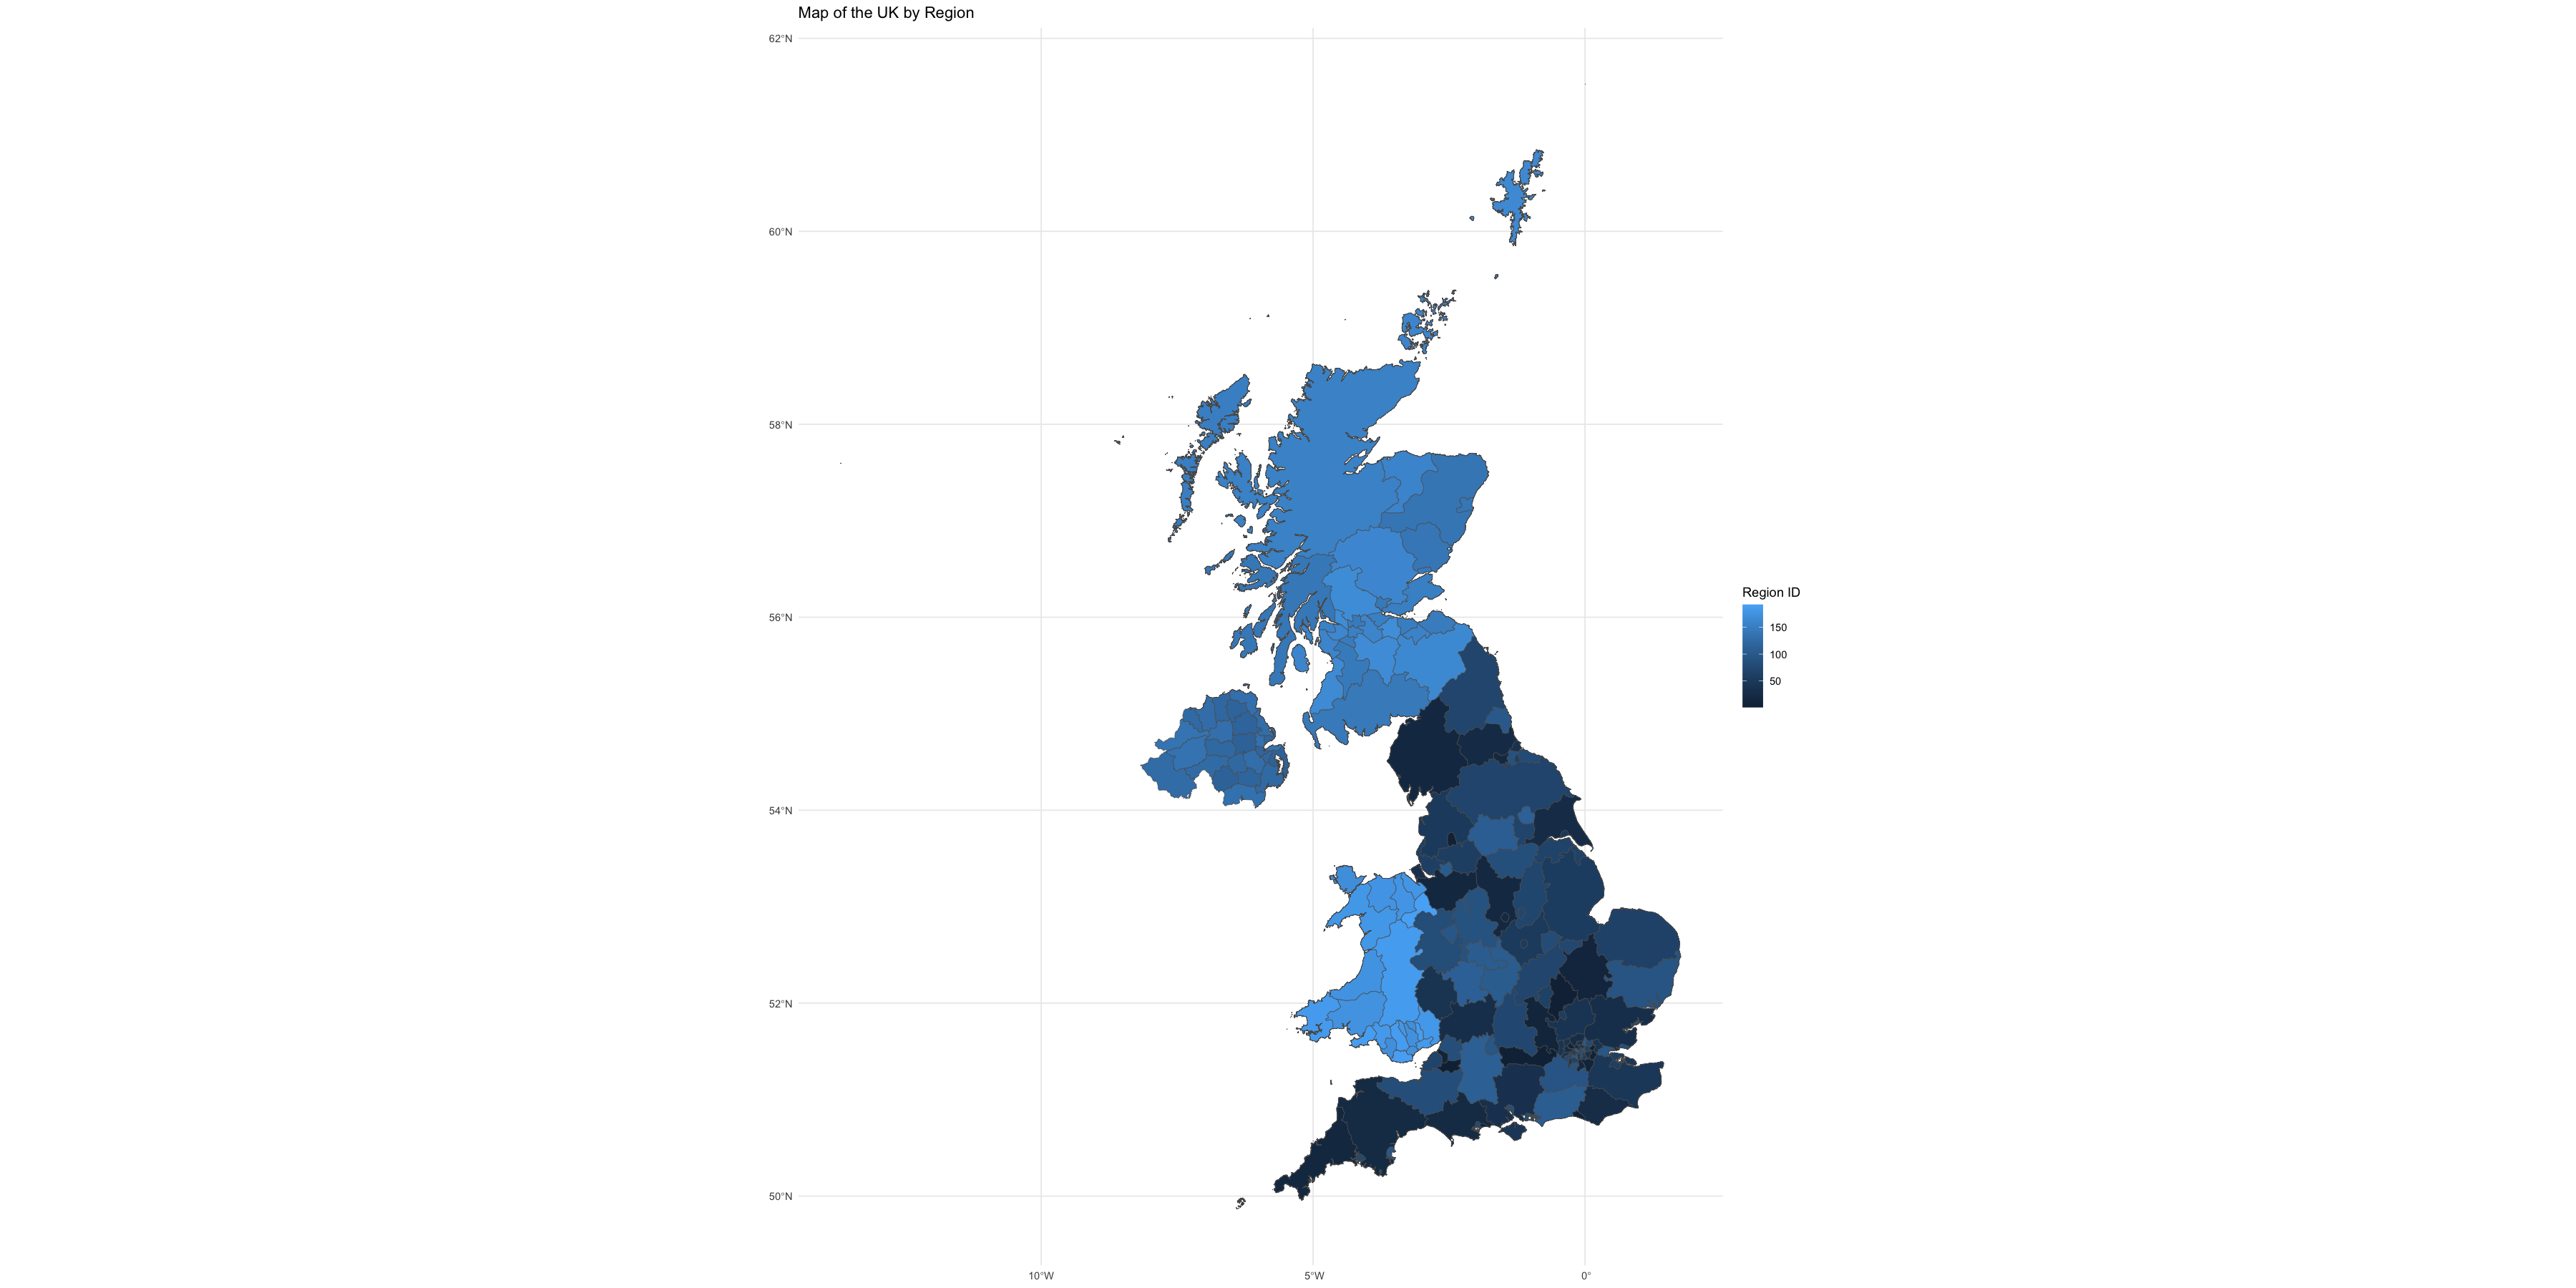

In [88]:
# First I check that the map works correctly. We got data outside of England and Wales as we thought
# That our data was supposed to be from UK but it,s fine, we will simply plot the data from England and Wales.

ggplot(data = map_uk) +
    geom_sf(aes(fill = ID_2)) +
    theme_minimal() +
    labs(title = "Map of the UK by Region",
        fill = "Region ID")

In [89]:
st_crs(map_uk)
st_crs(postalcodes)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

In [90]:
merged = st_join(map_uk, postalcodes, join = st_intersects)
head(merged)

ERROR while rich displaying an object: Error in loadNamespace(x): non c'`e alcun pacchetto chiamato 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geoj

ID_0 ISO NAME_0         ID_1 NAME_1  ID_2 NAME_2                      
1   242  GBR United Kingdom 1    England 1    Barking and Dagenham        
1.1 242  GBR United Kingdom 1    England 1    Barking and Dagenham        
2   242  GBR United Kingdom 1    England 2    Bath and North East Somerset
2.1 242  GBR United Kingdom 1    England 2    Bath and North East Somerset
2.2 242  GBR United Kingdom 1    England 2    Bath and North East Somerset
2.3 242  GBR United Kingdom 1    England 2    Bath and North East Somerset
    TYPE_2            ENGTYPE_2         NL_NAME_2 VARNAME_2 postcode min_price
1   London Borough    London Borough    NA        NA        RM8 3BE  220000   
1.1 London Borough    London Borough    NA        NA        RM8 3LE  195000   
2   Unitary Authority Unitary Authority NA        NA        BA1 1HL  135000   
2.1 Unitary Authority Unitary Authority NA        NA        BA1 1HZ   83000   
2.2 Unitary Authority Unitary Authority NA        NA        BA1 2BE  175000   
2.3 Unitary Authority Unitary Authority NA        NA        BA1 2BH  199950   
    max_price mean_price median_price id      geometry                      
1   220000    220000.0   220000        454677 MULTIPOLYGON (((0.152422 51...
1.1 195000    195000.0   195000        454336 MULTIPOLYGON (((0.152422 51...
2   135000    135000.0   135000       1652766 MULTIPOLYGON (((-2.71267 51...
2.1 395000    206437.5   182000       1652772 MULTIPOLYGON (((-2.71267 51...
2.2 275000    225000.0   225000       1652484 MULTIPOLYGON (((-2.71267 51...
2.3 199950    199950.0   199950       1652486 MULTIPOLYGON (((-2.71267 51...

In [91]:
merged = merged %>%
    group_by(ID_2) %>%
    summarize(medians = median(median_price, na.rm = TRUE))

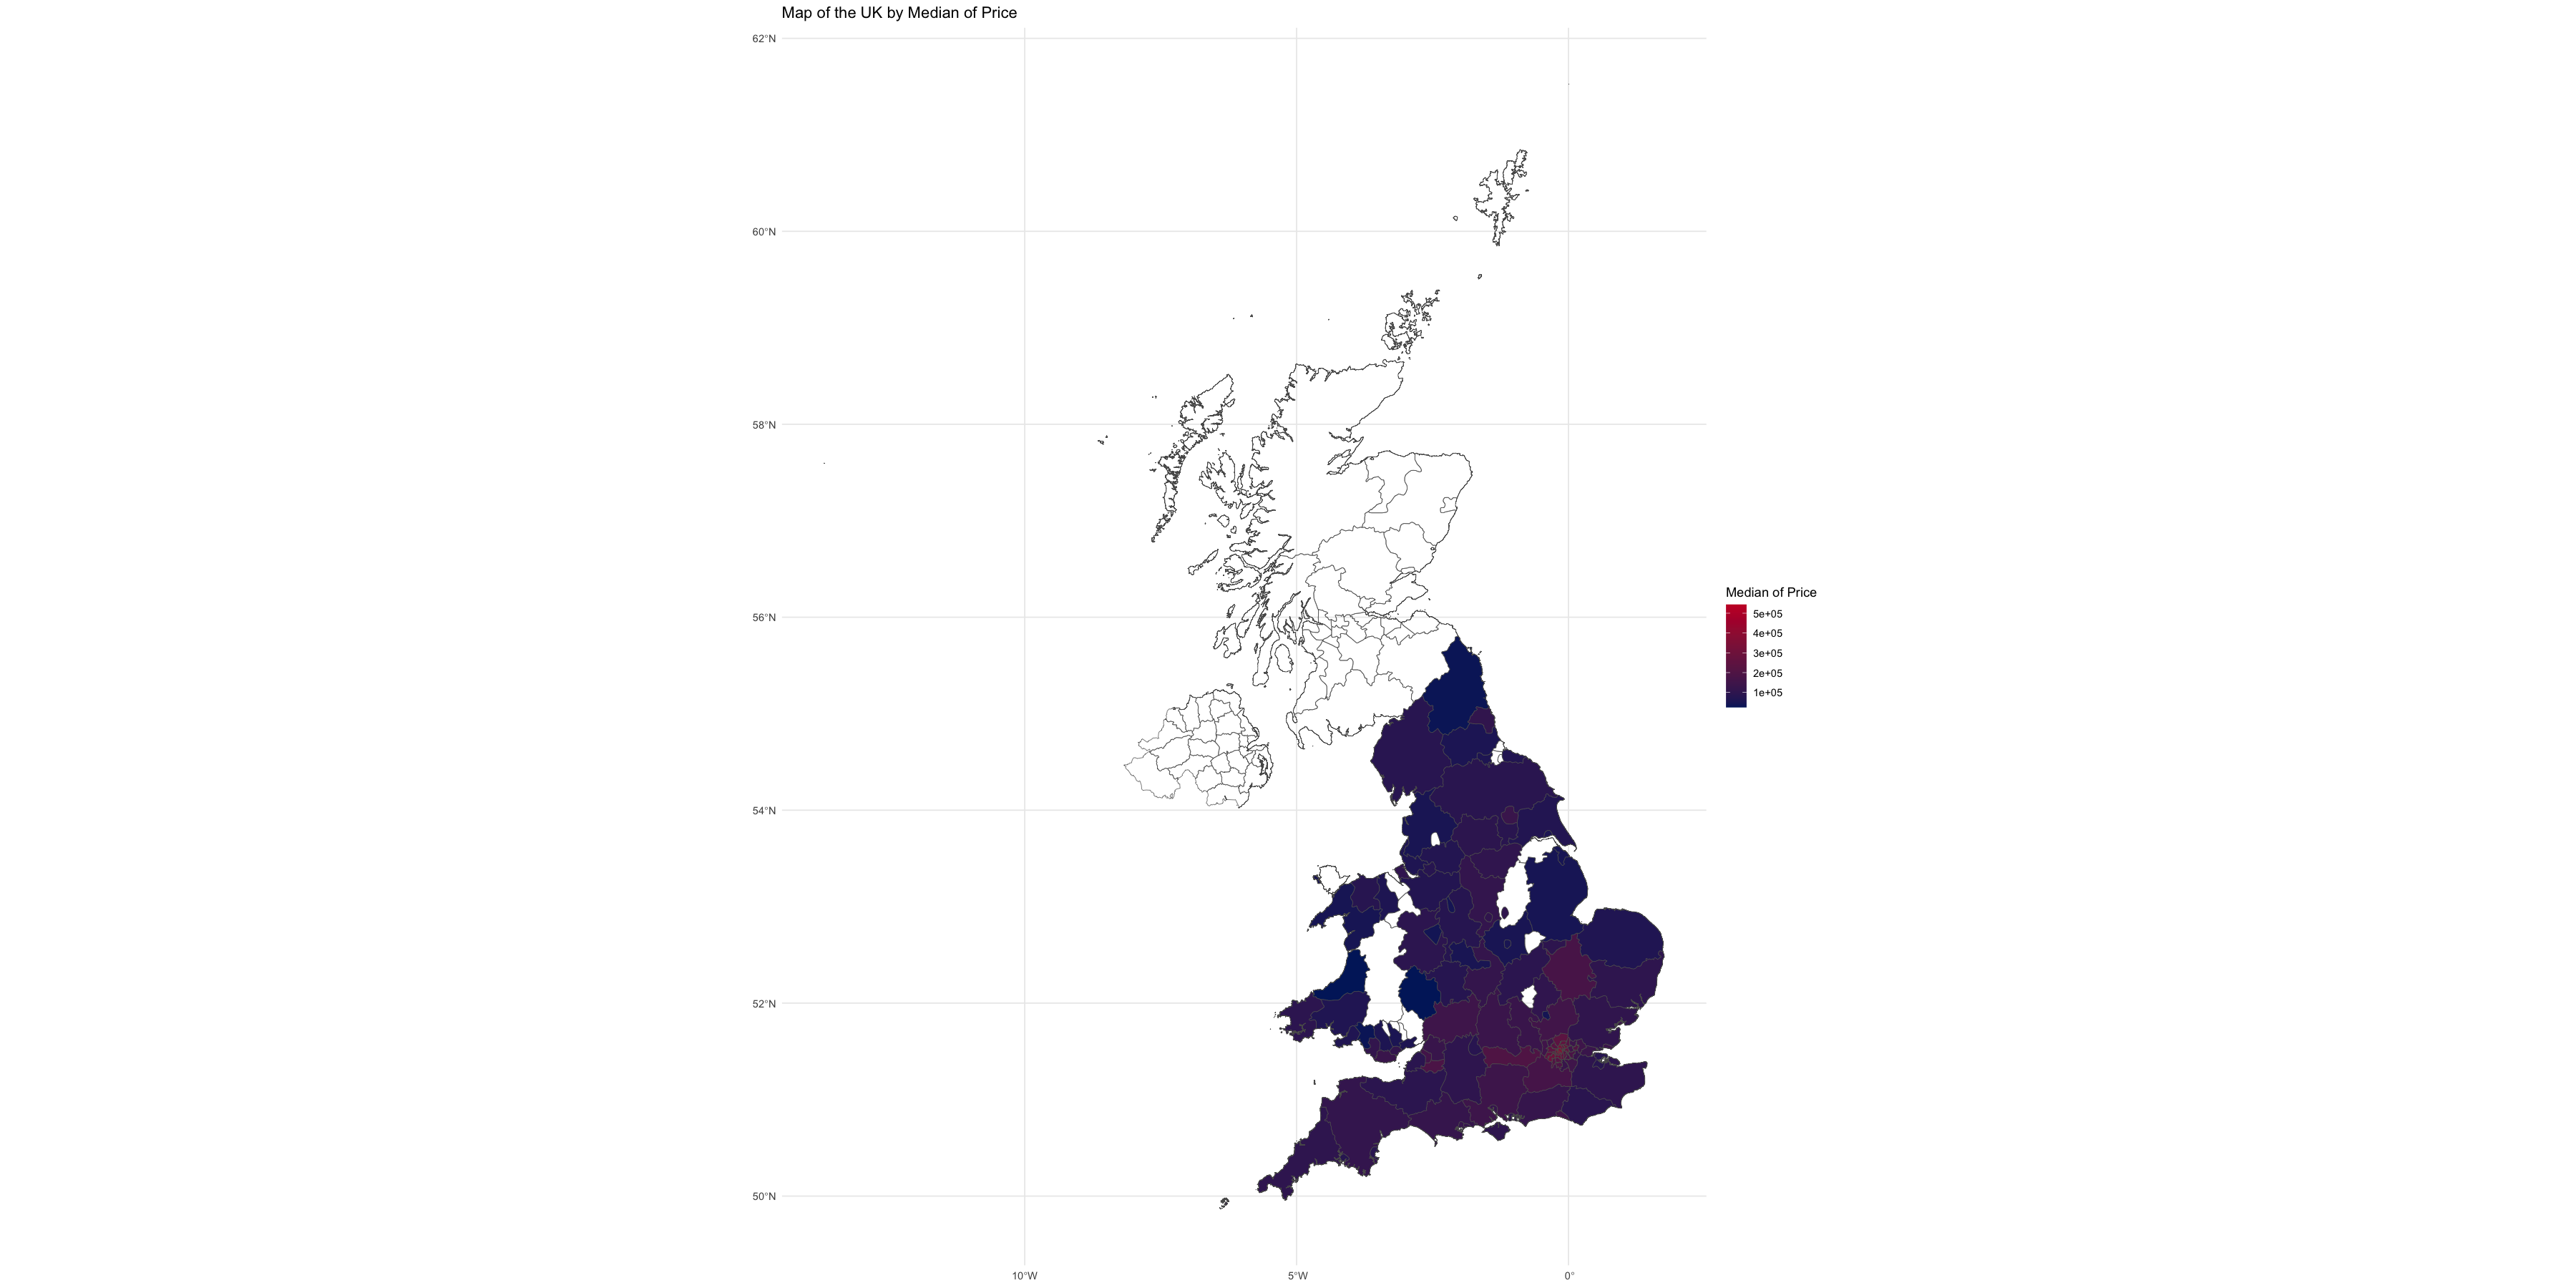

In [92]:
# We first plot the data with a scale of color that goes from blue to red

ggplot(data = merged) +
    geom_sf(aes(fill = medians)) +
    scale_fill_gradient(low = blue, high = red,
                        name = "Median of Price",
                        na.value = "transparent") +
    labs(title = "Map of the UK by Median of Price") +
    theme_minimal()

We can observe that the plot seems to not be capturing the variations in price correctly. Let's plot using viridis to check.

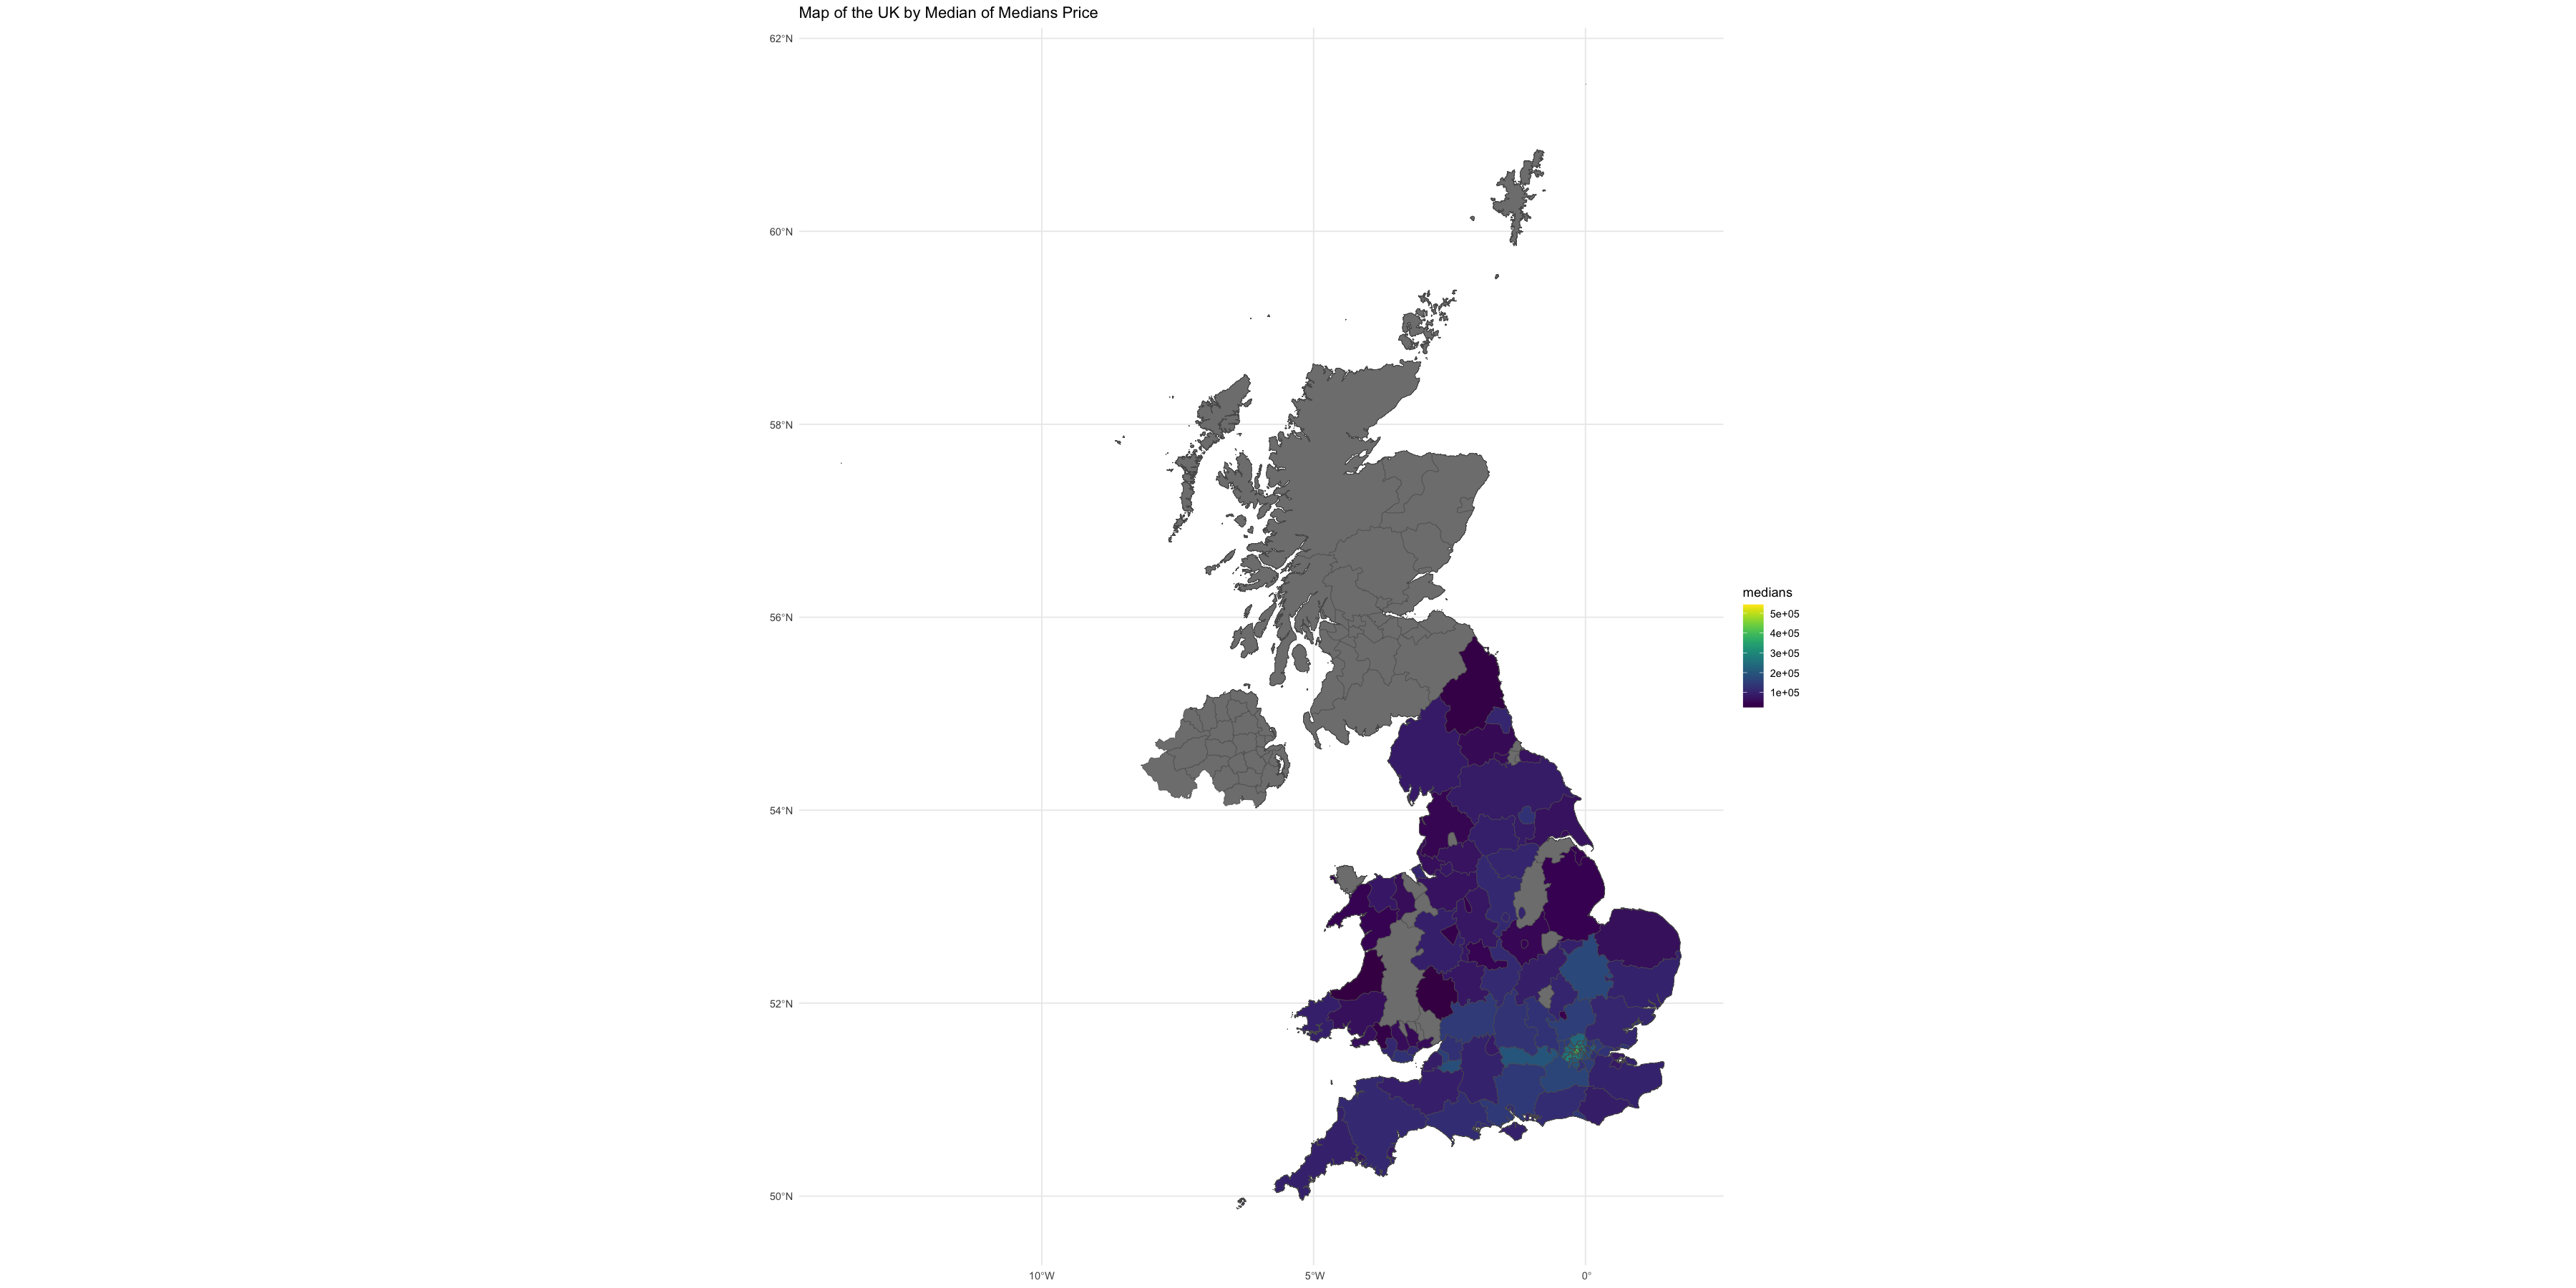

In [93]:
ggplot(data = merged) +
    geom_sf(aes(fill = medians)) +
    scale_fill_viridis() +
    labs(title = "Map of the UK by Median of Medians Price") +
    theme_minimal()

We can observe a little bit more of differences between different zones.

After looking a little bit deeper into it (that is, zooming in into the resulting plot), I saw that there actually is a brightest spot in the middle of London. 

The actual problem with the colors is that London is divided into very smal areas in the map that I got. As a result, the plot contains very small areas which are the ones getting the brightest colors and then the rest appear as if they had very little variation in price among them.

Actually this is useful information in itself. It tells us that the prices in London are sky-high with comparison to the rest of England and Wales. We can clearly see that the most expensive area of England and Wales is London (with the exception of few boroughs).

We can also observe that there are some areas without data. This is probably due to the fact that I'm using the subsampled version of the dataset and when I processed the subsample some areas from there might have been left without any observations.

### B3. Instead of using median price, you could have been asked to colour-code the mean house price. Would that have given a better view of the house prices across the UK? Please justify your answer.

In [94]:
mean_prices = london_sel %>% 
    group_by(district) %>% 
    summarize(mean_price = mean(price)) %>%
    arrange(desc(mean_price)) %>%
    mutate(mean_price = comma(mean_price))

head(mean_prices)

median_prices = london_sel %>%
    group_by(district) %>%
    summarize(median_price = median(price)) %>%
    arrange(desc(median_price)) %>%
    mutate(median_price = comma(median_price))

head(median_prices)

district               mean_price
1 CITY OF LONDON         1,763,451 
2 KENSINGTON AND CHELSEA 1,134,747 
3 CITY OF WESTMINSTER    1,111,753 
4 CAMDEN                 747,919   
5 HAMMERSMITH AND FULHAM 592,784   
6 ISLINGTON              541,903

district               median_price
1 KENSINGTON AND CHELSEA 525,000     
2 CITY OF WESTMINSTER    425,000     
3 CITY OF LONDON         405,000     
4 CAMDEN                 380,000     
5 HAMMERSMITH AND FULHAM 375,000     
6 RICHMOND UPON THAMES   342,000

Not really. As we already saw in part A, the distribution of prices varies a lot and if we only look at the price per a given geographical zone, there can be enough outliers to make the mean of the price go up or down significatively. 

In the case of London, for example, when looking at the mean prices we can see that the ranking of the most expensive boroughs remains in the same order as with the medians, but the amounts are significantly higher for the means due to the presence of some very relevant outliers. If we used the median price instead of the mean price, we could find ourselves overestimating the price we would expect to pay for a house in a given borough.

If we extrapolate this to a general case, as we said, it's better not to use the mean price as there are some expensive outliers more or less everywhere. Additionally, when dealing with this type of transaction we have to take into account that the bulk of the transactions are for normal flats and houses which are worth a normal price on the market. The distance between those prices and 0 is limited but the distance between those, normal/expected prices and the outliers is potentially much bigger so the big outliers are also usually not counter-weighted (or not completely counter-weighted) by the lower outliers. For example, if a big mansion is sold for 20 million, the distance from a median price of 1 million is of 19 million but if a flat is sold for near-nothing, the distance from the median price of 1 million is, at most, of 1 million.

# TASK C:

### C1. Examine the house prices for the years 2015 and 2019. How do these change over time? Do property prices seem to increase or decrease throughout these year?

In [95]:
prices15 = ppdata %>%
    filter(year(date_of_transfer) %in% c(2015))

summary(prices15$price)

prices15 = ppdata %>%
    filter(format(as.Date(date_of_transfer), "%Y") == "2015") %>%
    pull(price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20000  177750  334000  420225  518294 6600000 

In [96]:
prices19 = ppdata %>%
    filter(year(date_of_transfer) %in% c(2019))

summary(prices19$price)

prices19 = ppdata %>%
    filter(format(as.Date(date_of_transfer), "%Y") == "2019") %>%
    pull(price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40000  207000  365000  427843  520000 5350000 

After examining the data, it does look like there might be an increase in prices from 2015 to 2019. I base this on the fact that every single summary statistic except for the maximum value (which is clearly an outlier in this case) from 2019 is higher than the corresponding statistic from 2015 so the distribution of prices in 2019 is above that of the prices in 2015 at every main percentile. This is indeed a very strong indicator that the prices have indeed gone up.

We could also check this with a couple of boxplot graphs but the price outliers would make it very difficult to do the comparison at eye level so we would probably need to use a logarithmic scale for the prices and even then the comparison would probably be difficult to asses at eye level. Let's produce the boxlots to check it.

In [97]:
prices1519 = ppdata %>%
    filter(year(date_of_transfer) %in% c(2015, 2019))

summary(prices1519$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20000  188000  348000  423392  520000 6600000 

In [98]:
ggplot(prices1519, aes(x = as.factor(year(date_of_transfer)), y = log(price))) +
    geom_boxplot(aes(fill = as.factor(year(date_of_transfer)))) +
    labs(title = "Distribution of House Prices in 2015 and 2019",
        x = "Year",
        y = "Log(Price)") +
    theme_minimal() + theme(legend.position = "none")

Indeed, the boxplots are very difficult to read. Let's try to perform a statistical test to check if the distributions are significantly different. The Wilcox test is appropriate for this task with the alternative set to 'greater'.

In [99]:
wilcox.test(prices19, prices15, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  prices19 and prices15
W = 145056, p-value = 0.0449
alternative hypothesis: true location shift is greater than 0


And as we expected from examining the summary statistics of both distributions, we have statistical evidence that the difference in the distributions location is greater than 0 when going from 15 to 19, which means that, with 5% significance, the prices in 2019 are higher than in 2015.

### C2. Is there a significant relationship between the price of a property and the time of year it is sold? Does this vary with type of property?

In [100]:
ppdata$quarter = quarter(ppdata$date_of_transfer)
test_stat_ANOVA = aov(price ~ factor(quarter), data = ppdata)
summary(test_stat_ANOVA)

                   Df    Sum Sq   Mean Sq F value Pr(>F)
factor(quarter)     3 1.605e+11 5.350e+10   0.655   0.58
Residuals       19301 1.577e+15 8.173e+10               

In [101]:
ggplot(ppdata, aes(x = factor(quarter), y = log(price))) +
  geom_boxplot(fill = blue, color = red, size = 1) +
  labs(title = "Comparison of Mean House Prices Across Quarters",
       x = "Quarter",
       y = "Mean Price") +
  theme_minimal() +
  theme(plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 24),
        axis.text = element_text(size = 24),
        legend.position = "none") + coord_cartesian(ylim = c(11, 13))

At a first glance, quarters 2 and 3 look the most dissimilar. If there's evidence of difference between those two then we might be able to say that there is evidence of a relationship between price and time of year. If they are not then most certainly we cannot talk about evidence of such a relationship.

In [102]:
quarter2 = ppdata %>%
    filter(quarter == 2) %>%
    pull(price)

quarter3 = ppdata %>%
    filter(quarter == 3) %>%
    pull(price)

In [103]:
wilcox.test(quarter3, quarter2, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  quarter3 and quarter2
W = 13174735, p-value = 0.008562
alternative hypothesis: true location shift is greater than 0


We get a p-value of 0.0086 so we can determine with very high confidence that there is a significant correlation between the price between quarters 2 and 3 of each year. Prices go up during q3 generally.

This relationship might also be there between quarters 3 and 4 as well. Let's check that.

In [104]:
quarter1 = ppdata %>%
    filter(quarter == 2) %>%
    pull(price)

quarter4 = ppdata %>%
    filter(quarter == 3) %>%
    pull(price)

In [105]:
wilcox.test(quarter4, quarter3, alternative = "greater")
wilcox.test(quarter2, quarter1, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  quarter4 and quarter3
W = 14209780, p-value = 0.5
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  quarter2 and quarter1
W = 11572860, p-value = 0.5
alternative hypothesis: true location shift is greater than 0


Both of those tests don't allow us to reject the null hypotheses so we can't say that there is a significant difference between q1 and q2 or between q3 and q4. We still can only say that there is a significant difference between q2 and q3.